In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
 
import seaborn as sns
import json
import pandas as pd

from IPython.core.debugger import Tracer

In [3]:
def make_dataframe(filename, trial_id, stride = 1, stop_point=500):
    with open(filename) as jfile:
        dat = json.load(jfile)
    for i in range(len(dat)):
        dat[i] = [trial_id] + dat[i]
    stop_point = min(stop_point, len(dat)-5)
    dat = dat[:stop_point:stride]
    df = pd.DataFrame(dat, columns=['trial_id','wall_time', 'step', 'value'])
    return df

In [4]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'error_test_cond_cifar_2_vs_4_block_bs900.pdf'


# bs900_mc_drop
file_names_gate_bs900 = ['./figures_neurips/result_data_published/run-900-gatecnf-2_error_validation-tag-error.json',
                           './figures_neurips/result_data_published/run-900-gatecnf-3_error_validation-tag-error.json',]
keys_gate_bs900 = ['run2','run3']
id_gate_bs900 = 'Gated InfoCNF'
stop_point_gate_bs900 = 500

In [68]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'error_test_cond_cifar_bs900.pdf'


# # bs900
# file_names_bs900 = ['./figures_neurips/result_data_published/run-900_run1_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run2_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run3_error_validation-tag-error.json']
# keys_bs900 = ['run1','run2','run3']
# id_bs900 = 'C-FFJO (baseline)'
# stop_point_bs900 = 500

# bs900_drop
file_names_ccnf_bs900 = ['./figures_neurips/result_data_published/run-900-ccnf-drop-1_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-2_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-3_error_validation-tag-error.json',]
keys_ccnf_bs900 = ['run1','run2','run3']
id_ccnf_bs900 = 'CCNF (baseline)'
stop_point_ccnf_bs900 = 500

# bs900_mc
file_names_info_bs900 = ['./figures_neurips/result_data_published/run-900-infocnf-1_error_validation-tag-error.json',
                      './figures_neurips/result_data_published/run-900-infocnf-2_error_validation-tag-error.json',
                      './figures_neurips/result_data_published/run-900-infocnf-3_error_validation-tag-error.json',]
keys_info_bs900 = ['run1','run2','run3']
id_info_bs900 = 'InfoCNF'
stop_point_info_bs900 = 500

# bs900_mc
file_names_infotune_bs900 = ['./figures_neurips/result_data_published/run-900-infotunecnf-1_error_validation-tag-error.json',
                      './figures_neurips/result_data_published/run-900-infotunecnf-2_error_validation-tag-error.json',
                      './figures_neurips/result_data_published/run-900-infotunecnf-3_error_validation-tag-error.json',]
keys_infotune_bs900 = ['run1','run2','run3']
id_infotune_bs900 = 'InfoCNF_tuned'
stop_point_infotune_bs900 = 500

# bs900_mc_drop
file_names_gate_bs900 = ['./figures_neurips/result_data_published/run-900-gatecnf-2_error_validation-tag-error.json',
                           './figures_neurips/result_data_published/run-900-gatecnf-3_error_validation-tag-error.json',]
keys_gate_bs900 = ['run1','run2','run3']
id_gate_bs900 = 'Gated InfoCNF'
stop_point_gate_bs900 = 500

ccnf
33.33333432674408
1.099767380961959
info
21.719999611377716
0.5418486744294913
gate
21.319999545812607
0.4100002348423004
info
25.07999986410141
4.476002585437177


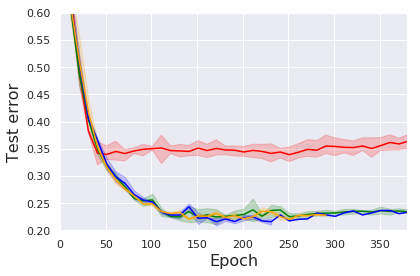

In [69]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_min

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

# sns_plot = plot_line(file_names_ccnf_bs900, keys_ccnf_bs900, id_ccnf_bs900, stride=10, stop_point=stop_point_ccnf_bs900, color='red')
# sns_plot = plot_line(file_names_info_bs900, keys_info_bs900, id_info_bs900, stride=10, stop_point=stop_point_info_bs900, color='green')
# sns_plot = plot_line(file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride=10, stop_point=stop_point_gate_bs900, color='blue')

sns_plot, df_min_ccnf = plot_line(file_names_ccnf_bs900, keys_ccnf_bs900, id_ccnf_bs900, stride=10, stop_point=stop_point_ccnf_bs900, color='red')
sns_plot, df_min_info = plot_line(file_names_info_bs900, keys_info_bs900, id_info_bs900, stride=10, stop_point=stop_point_info_bs900, color='green')
sns_plot, df_min_gate = plot_line(file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride=10, stop_point=stop_point_gate_bs900, color='blue')
sns_plot, df_min_infotune = plot_line(file_names_infotune_bs900, keys_infotune_bs900, id_infotune_bs900, stride=10, stop_point=stop_point_infotune_bs900, color='orange')

print('ccnf')
print(np.mean(df_min_ccnf) * 100)
print(np.std(df_min_ccnf) * 100)

print('info')
print(np.mean(df_min_info) * 100)
print(np.std(df_min_info) * 100)

print('gate')
print(np.mean(df_min_gate) * 100)
print(np.std(df_min_gate) * 100)

print('info')
print(np.mean(df_min_infotune) * 100)
print(np.std(df_min_infotune) * 100)

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(0.2,0.6)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [70]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nll_test_cond_cifar_bs900.pdf'


# # bs900
# file_names_bs900 = ['./figures_neurips/result_data_published/run-900_run1_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run2_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run3_error_validation-tag-error.json']
# keys_bs900 = ['run1','run2','run3']
# id_bs900 = 'C-FFJO (baseline)'
# stop_point_bs900 = 500

# bs900_drop
file_names_ccnf_bs900 = ['./figures_neurips/result_data_published/run-900-ccnf-drop-1_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-2_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_ccnf_bs900 = ['run1','run2','run3']
id_ccnf_bs900 = 'CCNF (baseline)'
stop_point_ccnf_bs900 = 500

# bs900_mc
file_names_info_bs900 = ['./figures_neurips/result_data_published/run-900-infocnf-1_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures_neurips/result_data_published/run-900-infocnf-2_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures_neurips/result_data_published/run-900-infocnf-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_info_bs900 = ['run1','run2','run3']
id_info_bs900 = 'InfoCNF'
stop_point_info_bs900 = 500

file_names_infotune_bs900 = ['./figures_neurips/result_data_published/run-900-infotunecnf-1_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures_neurips/result_data_published/run-900-infotunecnf-2_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures_neurips/result_data_published/run-900-infotunecnf-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_infotune_bs900 = ['run1','run2','run3']
id_infotune_bs900 = 'InfoCNF_tuned'
stop_point_infotune_bs900 = 500

# bs900_mc_drop
file_names_gate_bs900 = ['./figures_neurips/result_data_published/run-900-gatecnf-2_bits_per_dim_validation-tag-bits_per_dim.json',
                           './figures_neurips/result_data_published/run-900-gatecnf-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_gate_bs900 = ['run1','run2','run3']
id_gate_bs900 = 'Gated InfoCNF'
stop_point_gate_bs900 = 500

ccnf
3.512211004892985
0.0046063272650407544
info
3.534806569417318
0.004200445428470029
gate
3.575302839279175
0.008852005004882812
infotune
3.616464455922445
0.09224705038140564


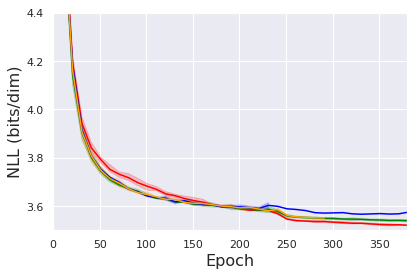

In [71]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_min

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

# sns_plot, df_min_ccnf = plot_line(file_names_ccnf_bs900, keys_ccnf_bs900, id_ccnf_bs900, stride=10, stop_point=stop_point_ccnf_bs900, color='red')
# sns_plot, df_min_info = plot_line(file_names_info_bs900, keys_info_bs900, id_info_bs900, stride=10, stop_point=stop_point_info_bs900, color='green')
# sns_plot, df_min_gate = plot_line(file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride=10, stop_point=stop_point_gate_bs900, color='blue')

sns_plot, df_min_ccnf = plot_line(file_names_ccnf_bs900, keys_ccnf_bs900, id_ccnf_bs900, stride=10, stop_point=stop_point_ccnf_bs900, color='red')
sns_plot, df_min_info = plot_line(file_names_info_bs900, keys_info_bs900, id_info_bs900, stride=10, stop_point=stop_point_info_bs900, color='green')
sns_plot, df_min_gate = plot_line(file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride=10, stop_point=stop_point_gate_bs900, color='blue')
sns_plot, df_min_infotune = plot_line(file_names_infotune_bs900, keys_infotune_bs900, id_infotune_bs900, stride=10, stop_point=stop_point_infotune_bs900, color='orange')


print('ccnf')
print(np.mean(df_min_ccnf))
print(np.std(df_min_ccnf))

print('info')
print(np.mean(df_min_info))
print(np.std(df_min_info))


print('gate')
print(np.mean(df_min_gate))
print(np.std(df_min_gate))

print('infotune')
print(np.mean(df_min_infotune))
print(np.std(df_min_infotune))

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(3.5,4.4)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [128]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'marginal_nll_test_cond_cifar_bs900.pdf'


# # bs900
# file_names_bs900 = ['./figures_neurips/result_data_published/run-900_run1_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run2_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run3_error_validation-tag-error.json']
# keys_bs900 = ['run1','run2','run3']
# id_bs900 = 'C-FFJO (baseline)'
# stop_point_bs900 = 500

# bs900_drop
file_names_ccnf_bs900 = ['./figures_neurips/result_data_published/run-900_ccnf_run1_nll_marginal_validation-tag-nll_marginal.json',
                        './figures_neurips/result_data_published/run-900_ccnf_run2_nll_marginal_validation-tag-nll_marginal.json',
                        './figures_neurips/result_data_published/run-900_ccnf_run3_nll_marginal_validation-tag-nll_marginal.json',]
keys_ccnf_bs900 = ['run1','run2','run3']
id_ccnf_bs900 = 'CCNF (baseline)'
stop_point_ccnf_bs900 = 500

# bs900_mc
file_names_info_bs900 = ['./figures_neurips/result_data_published/run-900_info_run1_nll_marginal_validation-tag-nll_marginal.json',
                      './figures_neurips/result_data_published/run-900_info_run2_nll_marginal_validation-tag-nll_marginal.json',
                      './figures_neurips/result_data_published/run-900_info_run3_nll_marginal_validation-tag-nll_marginal.json',]
keys_info_bs900 = ['run1','run2','run3']
id_info_bs900 = 'InfoCNF'
stop_point_info_bs900 = 500

# file_names_infotune_bs900 = ['./figures_neurips/result_data_published/run-900-infotunecnf-1_bits_per_dim_validation-tag-bits_per_dim.json',
#                       './figures_neurips/result_data_published/run-900-infotunecnf-2_bits_per_dim_validation-tag-bits_per_dim.json',
#                       './figures_neurips/result_data_published/run-900-infotunecnf-3_bits_per_dim_validation-tag-bits_per_dim.json',]
# keys_infotune_bs900 = ['run1','run2','run3']
# id_infotune_bs900 = 'InfoCNF_tuned'
# stop_point_infotune_bs900 = 500

# bs900_mc_drop
file_names_gate_bs900 = ['./figures_neurips/result_data_published/run-900_gate_std_6_run2_nll_marginal_validation-tag-nll_marginal.json',
                           './figures_neurips/result_data_published/run-900_gate_std_6_run3_nll_marginal_validation-tag-nll_marginal.json',]
keys_gate_bs900 = ['run2','run3']
id_gate_bs900 = 'Gated InfoCNF'
stop_point_gate_bs900 = 500

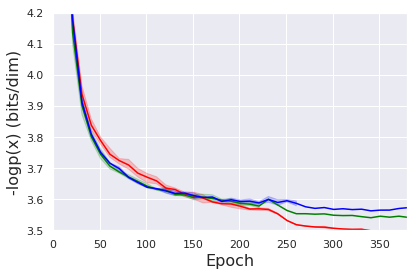

In [131]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_min

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

# sns_plot, df_min_ccnf = plot_line(file_names_ccnf_bs900, keys_ccnf_bs900, id_ccnf_bs900, stride=10, stop_point=stop_point_ccnf_bs900, color='red')
# sns_plot, df_min_info = plot_line(file_names_info_bs900, keys_info_bs900, id_info_bs900, stride=10, stop_point=stop_point_info_bs900, color='green')
# sns_plot, df_min_gate = plot_line(file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride=10, stop_point=stop_point_gate_bs900, color='blue')

sns_plot, df_min_ccnf = plot_line(file_names_ccnf_bs900, keys_ccnf_bs900, id_ccnf_bs900, stride=10, stop_point=stop_point_ccnf_bs900, color='red')
sns_plot, df_min_info = plot_line(file_names_info_bs900, keys_info_bs900, id_info_bs900, stride=10, stop_point=stop_point_info_bs900, color='green')
sns_plot, df_min_gate = plot_line(file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride=10, stop_point=stop_point_gate_bs900, color='blue')
# sns_plot, df_min_infotune = plot_line(file_names_infotune_bs900, keys_infotune_bs900, id_infotune_bs900, stride=10, stop_point=stop_point_infotune_bs900, color='orange')


# print('ccnf')
# print(np.mean(df_min_ccnf))
# print(np.std(df_min_ccnf))

# print('info')
# print(np.mean(df_min_info))
# print(np.std(df_min_info))


# print('gate')
# print(np.mean(df_min_gate))
# print(np.std(df_min_gate))

# print('infotune')
# print(np.mean(df_min_infotune))
# print(np.std(df_min_infotune))

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('-logp(x) (bits/dim)', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(3.5,4.2)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [73]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nfe_cond_cifar_bs900.pdf'


# # bs900
# file_names_bs900 = ['./figures_neurips/result_data_published/run-900_run1_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run2_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run3_error_validation-tag-error.json']
# keys_bs900 = ['run1','run2','run3']
# id_bs900 = 'C-FFJO (baseline)'
# stop_point_bs900 = 500

# bs900_drop
file_names_ccnf_bs900 = ['./figures_neurips/result_data_published/run-900-ccnf-drop-1_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-2_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-3_nfe_train_epoch-tag-nfe.json',]
keys_ccnf_bs900 = ['run1','run2','run3']
id_ccnf_bs900 = 'CCNF (baseline)'
stop_point_ccnf_bs900 = 500

# bs900_mc
file_names_info_bs900 = ['./figures_neurips/result_data_published/run-900-infocnf-1_nfe_train_epoch-tag-nfe.json',
                      './figures_neurips/result_data_published/run-900-infocnf-2_nfe_train_epoch-tag-nfe.json',
                      './figures_neurips/result_data_published/run-900-infocnf-3_nfe_train_epoch-tag-nfe.json',]
keys_info_bs900 = ['run1','run2','run3']
id_info_bs900 = 'InfoCNF'
stop_point_info_bs900 = 500

# bs900_mc
file_names_infotune_bs900 = ['./figures_neurips/result_data_published/run-900-infotunecnf-1_nfe_train_epoch-tag-nfe.json',
                      './figures_neurips/result_data_published/run-900-infotunecnf-2_nfe_train_epoch-tag-nfe.json',
                      './figures_neurips/result_data_published/run-900-infotunecnf-3_nfe_train_epoch-tag-nfe.json',]
keys_infotune_bs900 = ['run1','run2','run3']
id_infotune_bs900 = 'InfoCNF_tuned'
stop_point_infotune_bs900 = 500

# bs900_mc_drop
file_names_gate_bs900 = ['./figures_neurips/result_data_published/run-900-gatecnf-2_nfe_train_epoch-tag-nfe.json',
                           './figures_neurips/result_data_published/run-900-gatecnf-3_nfe_train_epoch-tag-nfe.json',]
keys_gate_bs900 = ['run1','run2','run3']
id_gate_bs900 = 'Gated InfoCNF'
stop_point_gate_bs900 = 500

ccnf
920.7017386881511
22.398001303135267
info
980.4351593308223
10.157614227509665
info
676.0840362001918
61.21644063305888
gate
768.5879468282064
57.75562693277999


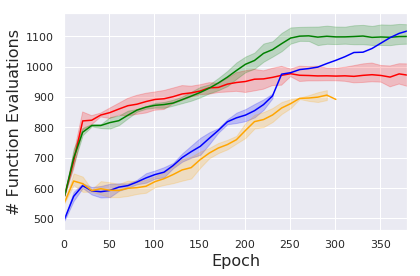

In [74]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_mean = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_mean.append(np.mean(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_mean

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

# sns_plot = plot_line(file_names_ccnf_bs900, keys_ccnf_bs900, id_ccnf_bs900, stride=10, stop_point=stop_point_ccnf_bs900, color='red')
# sns_plot = plot_line(file_names_info_bs900, keys_info_bs900, id_info_bs900, stride=10, stop_point=stop_point_info_bs900, color='green')
# sns_plot = plot_line(file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride=10, stop_point=stop_point_gate_bs900, color='blue')

sns_plot, df_mean_ccnf = plot_line(file_names_ccnf_bs900, keys_ccnf_bs900, id_ccnf_bs900, stride=10, stop_point=stop_point_ccnf_bs900, color='red')
sns_plot, df_mean_info = plot_line(file_names_info_bs900, keys_info_bs900, id_info_bs900, stride=10, stop_point=stop_point_info_bs900, color='green')
sns_plot, df_mean_gate = plot_line(file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride=10, stop_point=stop_point_gate_bs900, color='blue')
sns_plot, df_mean_infotune = plot_line(file_names_infotune_bs900, keys_infotune_bs900, id_infotune_bs900, stride=10, stop_point=stop_point_infotune_bs900, color='orange')


print('ccnf')
print(np.mean(df_mean_ccnf))
print(np.std(df_mean_ccnf))

print('info')
print(np.mean(df_mean_info))
print(np.std(df_mean_info))

print('info')
print(np.mean(df_mean_infotune))
print(np.std(df_mean_infotune))

print('gate')
print(np.mean(df_mean_gate))
print(np.std(df_mean_gate))

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('# Function Evaluations', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [23]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'error_test_cond_cifar_bs8k.pdf'


# # bs900
# file_names_bs900 = ['./figures_neurips/result_data_published/run-900_run1_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run2_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run3_error_validation-tag-error.json']
# keys_bs900 = ['run1','run2','run3']
# id_bs900 = 'C-FFJO (baseline)'
# stop_point_bs900 = 500

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_error_validation-tag-error.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF (baseline)'
stop_point_ccnf_bs8k = 500

# bs8k_mc
file_names_info_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-1_error_validation-tag-error.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-2_error_validation-tag-error.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-3_error_validation-tag-error.json',]
keys_info_bs8k = ['run1','run2','run3']
id_info_bs8k = 'InfoCNF'
stop_point_info_bs8k = 500

# b8k_mc_drop
file_names_gate_std15_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_error_validation-tag-error.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF'
stop_point_std15_gate_bs8k = 500

# file_names_gate_std30_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std30-1_error_validation-tag-error.json',
#                         './figures_neurips/result_data_published/run-8k-gatecnf-drop-std30-2_error_validation-tag-error.json',
#                         './figures_neurips/result_data_published/run-8k-gatecnf-drop-std30-3_error_validation-tag-error.json',]
# keys_gate_std30_bs8k = ['run1','run2','run3']
# id_gate_std30_bs8k = 'Gated InfoCNF'
# stop_point_std30_gate_bs8k = 500

ccnf
351.22110048929846
0.46063272650407544
info
353.4806569417318
0.42004454284700293
gate
357.5302839279175
0.8852005004882812


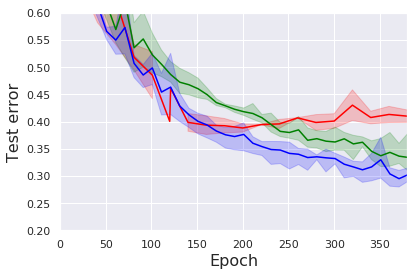

In [26]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_min

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

sns_plot, _ = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot, _ = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=10, stop_point=stop_point_info_bs8k, color='green')
sns_plot, _ = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=10, stop_point=stop_point_std15_gate_bs8k, color='blue')

# sns_plot, df_min_ccnf = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=1, stop_point=stop_point_ccnf_bs8k, color='red')
# sns_plot, df_min_info = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=1, stop_point=stop_point_info_bs8k, color='green')
# sns_plot, df_min_gate = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=1, stop_point=stop_point_std15_gate_bs8k, color='blue')

print('ccnf')
print(np.mean(df_min_ccnf) * 100)
print(np.std(df_min_ccnf) * 100)

print('info')
print(np.mean(df_min_info) * 100)
print(np.std(df_min_info) * 100)

print('gate')
print(np.mean(df_min_gate) * 100)
print(np.std(df_min_gate) * 100)

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(0.2,0.6)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [27]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nll_test_cond_cifar_bs8k.pdf'


# # bs900
# file_names_bs900 = ['./figures_neurips/result_data_published/run-900_run1_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run2_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run3_error_validation-tag-error.json']
# id_bs900 = 'C-FFJO (baseline)'
# stop_point_bs900 = 500

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_bits_per_dim_validation-tag-bits_per_dim.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF (baseline)'
stop_point_ccnf_bs8k = 500

# bs8k_mc
file_names_info_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-1_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-2_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_info_bs8k = ['run1','run2','run3']
id_info_bs8k = 'InfoCNF'
stop_point_info_bs8k = 500

# b8k_mc_drop
file_names_gate_std15_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF'
stop_point_std15_gate_bs8k = 500

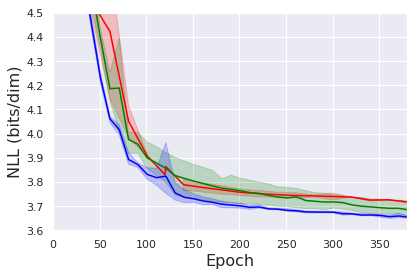

In [29]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_min

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

sns_plot, _ = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot, _ = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=10, stop_point=stop_point_info_bs8k, color='green')
sns_plot, _ = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=10, stop_point=stop_point_std15_gate_bs8k, color='blue')

# sns_plot, df_min_ccnf = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=1, stop_point=stop_point_ccnf_bs8k, color='red')
# sns_plot, df_min_info = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=1, stop_point=stop_point_info_bs8k, color='green')
# sns_plot, df_min_gate = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=1, stop_point=stop_point_std15_gate_bs8k, color='blue')

# print('ccnf')
# print(np.mean(df_min_ccnf))
# print(np.std(df_min_ccnf))

# print('info')
# print(np.mean(df_min_info))
# print(np.std(df_min_info))

# print('gate')
# print(np.mean(df_min_gate))
# print(np.std(df_min_gate))


sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(3.6,4.5)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [30]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nfe_cond_cifar_bs8k.pdf'


# # bs900
# file_names_bs900 = ['./figures_neurips/result_data_published/run-900_run1_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run2_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run3_error_validation-tag-error.json']
# keys_bs900 = ['run1','run2','run3']
# id_bs900 = 'C-FFJO (baseline)'
# stop_point_bs900 = 500

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_nfe_train_epoch-tag-nfe.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF (baseline)'
stop_point_ccnf_bs8k = 500

# bs8k_mc
file_names_info_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-1_nfe_train_epoch-tag-nfe.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-2_nfe_train_epoch-tag-nfe.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-3_nfe_train_epoch-tag-nfe.json',]
keys_info_bs8k = ['run1','run2','run3']
id_info_bs8k = 'InfoCNF'
stop_point_info_bs8k = 500

# b8k_mc_drop
file_names_gate_std15_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_nfe_train_epoch-tag-nfe.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF'
stop_point_std15_gate_bs8k = 500

# file_names_gate_std30_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std30-1_error_validation-tag-error.json',
#                         './figures_neurips/result_data_published/run-8k-gatecnf-drop-std30-2_error_validation-tag-error.json',
#                         './figures_neurips/result_data_published/run-8k-gatecnf-drop-std30-3_error_validation-tag-error.json',]
# keys_gate_std30_bs8k = ['run1','run2','run3']
# id_gate_std30_bs8k = 'Gated InfoCNF'
# stop_point_std30_gate_bs8k = 500

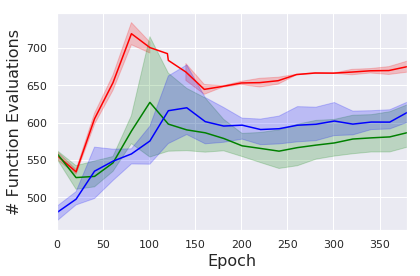

In [31]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_mean = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_mean.append(np.mean(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_mean

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

sns_plot, _ = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot, _ = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=20, stop_point=stop_point_info_bs8k, color='green')
sns_plot, _ = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=20, stop_point=stop_point_std15_gate_bs8k, color='blue')

# sns_plot, df_mean_ccnf = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=1, stop_point=stop_point_ccnf_bs8k, color='red')
# sns_plot, df_mean_info = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=1, stop_point=stop_point_info_bs8k, color='green')
# sns_plot, df_mean_gate = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=1, stop_point=stop_point_std15_gate_bs8k, color='blue')

# print('ccnf')
# print(np.mean(df_mean_ccnf))
# print(np.std(df_mean_ccnf))

# print('info')
# print(np.mean(df_mean_info))
# print(np.std(df_mean_info))

# print('gate')
# print(np.mean(df_mean_gate))
# print(np.std(df_mean_gate))


sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('# Function Evaluations', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.legend().set_visible(False)
# sns_plot.set_ylim(0.27,0.6)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [98]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nll_marginal_test_cond_cifar_bs8k.pdf'


# # bs900
# file_names_bs900 = ['./figures_neurips/result_data_published/run-900_run1_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run2_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run3_error_validation-tag-error.json']
# id_bs900 = 'C-FFJO (baseline)'
# stop_point_bs900 = 500

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_nll_marginal_validation-tag-nll_marginal.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_nll_marginal_validation-tag-nll_marginal.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF (baseline)'
stop_point_ccnf_bs8k = 500

# bs8k_mc
file_names_info_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-1_nll_marginal_validation-tag-nll_marginal.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-2_nll_marginal_validation-tag-nll_marginal.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-3_nll_marginal_validation-tag-nll_marginal.json',]
keys_info_bs8k = ['run1','run2','run3']
id_info_bs8k = 'InfoCNF'
stop_point_info_bs8k = 500

# b8k_mc_drop
file_names_gate_std15_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_nll_marginal_validation-tag-nll_marginal.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_nll_marginal_validation-tag-nll_marginal.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_nll_marginal_validation-tag-nll_marginal.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF'
stop_point_std15_gate_bs8k = 500

# bs8k_cnf
file_names_cnf_bs8k = ['./figures_neurips/result_data_published/run-8k_tunedtol_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k_tunedtol_run3_bits_per_dim_validation-tag-bits_per_dim.json',
                        ]
keys_cnf_bs8k = ['run2','run3']
id_cnf_bs8k = 'CNF (unconditional)'
stop_point_cnf_bs8k = 500

# b8k_mc_drop
file_names_gcnf_std15_bs8k = ['./figures_neurips/result_data_published/run-8k_rl_stdlearn_15_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k_rl_stdlearn_15_run3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_gcnf_std15_bs8k = ['run2','run3']
id_gcnf_std15_bs8k = 'Gated CNF (unconditional)'
stop_point_std15_gcnf_bs8k = 500





ccnf
3.6909393072128296
0.0031267404556274414
info
3.670239210128784
0.019667159500863576
gate
3.637126843134562
0.005424836235142234


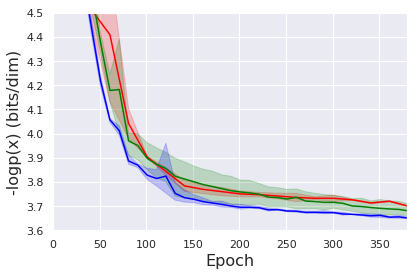

In [99]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None, linestyle=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color, linestyle=linestyle)
    return sns_plot, df_min

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

# sns_plot, _ = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
# sns_plot, _ = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=10, stop_point=stop_point_info_bs8k, color='green')
# sns_plot, _ = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=10, stop_point=stop_point_std15_gate_bs8k, color='blue')

sns_plot, df_min_ccnf = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot, df_min_info = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=10, stop_point=stop_point_info_bs8k, color='green')
sns_plot, df_min_gate = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=10, stop_point=stop_point_std15_gate_bs8k, color='blue')

#sns_plot, df_min_cnf = plot_line(file_names_cnf_bs8k, keys_cnf_bs8k, id_cnf_bs8k, stride=20, stop_point=stop_point_cnf_bs8k, color='orange',linestyle='dashed')
#sns_plot, df_min_gcnf = plot_line(file_names_gcnf_std15_bs8k, keys_gcnf_std15_bs8k, id_gcnf_std15_bs8k, stride=10, stop_point=stop_point_std15_gcnf_bs8k, color='magenta',linestyle='dashed')

print('ccnf')
print(np.mean(df_min_ccnf))
print(np.std(df_min_ccnf))

print('info')
print(np.mean(df_min_info))
print(np.std(df_min_info))

print('gate')
print(np.mean(df_min_gate))
print(np.std(df_min_gate))


sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('-logp(x) (bits/dim)', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(3.6,4.5)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [64]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nll_test_uncond_cifar_bs900.pdf'


# # bs900
# file_names_bs900 = ['./figures_neurips/result_data_published/run-900_run1_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run2_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run3_error_validation-tag-error.json']
# keys_bs900 = ['run1','run2','run3']
# id_bs900 = 'C-FFJO (baseline)'
# stop_point_bs900 = 500

# bs900_drop
file_names_cnf_bs900 = ['./figures_neurips/result_data_published/run-900_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-900_run3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_cnf_bs900 = ['run2','run3']
id_cnf_bs900 = 'CNF (baseline)'
stop_point_cnf_bs900 = 500

# bs900_mc_drop
file_names_gate_bs900 = ['./figures_neurips/result_data_published/run-900_rl_std_6_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                           './figures_neurips/result_data_published/run-900_rl_std_6_run3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_gate_bs900 = ['run2','run3']
id_gate_bs900 = 'Gated CNF'
stop_point_gate_bs900 = 500

ccnf
3.3717623949050903
0.007610678672790527
gate
3.376104474067688
0.018976807594299316


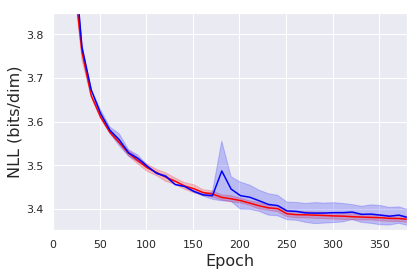

In [65]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_min

# sns_plot = plot_line(file_names_cnf_bs900, keys_cnf_bs900, id_cnf_bs900, stride=10, stop_point=stop_point_cnf_bs900, color='red')
# sns_plot = plot_line(file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride=10, stop_point=stop_point_gate_bs900, color='blue')
sns_plot, df_min_ccnf = plot_line(file_names_cnf_bs900, keys_cnf_bs900, id_cnf_bs900, stride=10, stop_point=stop_point_cnf_bs900, color='red')
sns_plot, df_min_gate = plot_line(file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride=10, stop_point=stop_point_gate_bs900, color='blue')

print('ccnf')
print(np.mean(df_min_ccnf))
print(np.std(df_min_ccnf))

print('gate')
print(np.mean(df_min_gate))
print(np.std(df_min_gate))


sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(3.35,3.85)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [66]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nfe_uncond_cifar_bs900.pdf'


# # bs900
# file_names_bs900 = ['./figures_neurips/result_data_published/run-900_run1_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run2_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run3_error_validation-tag-error.json']
# keys_bs900 = ['run1','run2','run3']
# id_bs900 = 'C-FFJO (baseline)'
# stop_point_bs900 = 500

# bs900_drop
file_names_cnf_bs900 = ['./figures_neurips/result_data_published/run-900_run2_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-900_run3_nfe_train_epoch-tag-nfe.json',]
keys_cnf_bs900 = ['run2','run3']
id_cnf_bs900 = 'CNF (baseline)'
stop_point_cnf_bs900 = 500

# bs900_mc_drop
file_names_gate_bs900 = ['./figures_neurips/result_data_published/run-900_rl_std_6_run2_nfe_train_epoch-tag-nfe.json',
                           './figures_neurips/result_data_published/run-900_rl_std_6_run3_nfe_train_epoch-tag-nfe.json',]
keys_gate_bs900 = ['run2','run3']
id_gate_bs900 = 'Gated CNF'
stop_point_gate_bs900 = 500

ccnf
951.8019960426059
12.136099713593126
gate
810.0462222629124
8.391376071506102


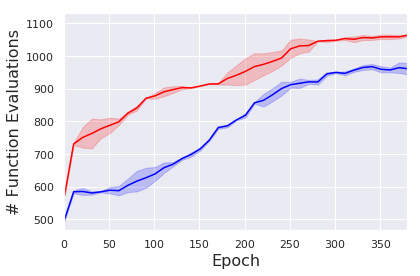

In [67]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_mean = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_mean.append(np.mean(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_mean

# sns_plot = plot_line(file_names_cnf_bs900, keys_cnf_bs900, id_cnf_bs900, stride=10, stop_point=stop_point_cnf_bs900, color='red')
# sns_plot = plot_line(file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride=10, stop_point=stop_point_gate_bs900, color='blue')

sns_plot, df_mean_ccnf = plot_line(file_names_cnf_bs900, keys_cnf_bs900, id_cnf_bs900, stride=10, stop_point=stop_point_cnf_bs900, color='red')
sns_plot, df_mean_gate = plot_line(file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride=10, stop_point=stop_point_gate_bs900, color='blue')

print('ccnf')
print(np.mean(df_mean_ccnf))
print(np.std(df_mean_ccnf))

print('gate')
print(np.mean(df_mean_gate))
print(np.std(df_mean_gate))

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('# Function Evaluations', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [32]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'error_test_large_batches_methods.pdf'


# # bs900
# file_names_bs900 = ['./figures_neurips/result_data_published/run-900_run1_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run2_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run3_error_validation-tag-error.json']
# keys_bs900 = ['run1','run2','run3']
# id_bs900 = 'C-FFJO (baseline)'
# stop_point_bs900 = 500

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_error_validation-tag-error.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF'
stop_point_ccnf_bs8k = 500

# bs8k_mc
file_names_info_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-1_error_validation-tag-error.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-2_error_validation-tag-error.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-3_error_validation-tag-error.json',]
keys_info_bs8k = ['run1','run2','run3']
id_info_bs8k = 'InfoCNF'
stop_point_info_bs8k = 500

# bs8k_baseline_ccnf
file_names_ccnf_bl_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-baseline-1_error_validation-tag-error.json',]
keys_ccnf_bl_bs8k = ['run1',]
id_ccnf_bl_bs8k = 'CCNF without large lr \n and adjusted tolerance'
stop_point_ccnf_bl_bs8k = 500

# bs8k_baseline_ccnf
file_names_info_bl_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-baseline-1_error_validation-tag-error.json',]
keys_info_bl_bs8k = ['run1',]
id_info_bl_bs8k = 'InfoCNF without large lr \n and adjusted tolerance'
stop_point_info_bl_bs8k = 500

# file_names_gate_std30_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std30-1_error_validation-tag-error.json',
#                         './figures_neurips/result_data_published/run-8k-gatecnf-drop-std30-2_error_validation-tag-error.json',
#                         './figures_neurips/result_data_published/run-8k-gatecnf-drop-std30-3_error_validation-tag-error.json',]
# keys_gate_std30_bs8k = ['run1','run2','run3']
# id_gate_std30_bs8k = 'Gated InfoCNF'
# stop_point_std30_gate_bs8k = 500

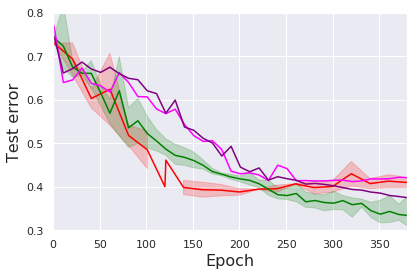

In [33]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

sns_plot = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=10, stop_point=stop_point_info_bs8k, color='green')
sns_plot = plot_line(file_names_ccnf_bl_bs8k, keys_ccnf_bl_bs8k, id_ccnf_bl_bs8k, stride=10, stop_point=stop_point_ccnf_bl_bs8k, color='magenta')
sns_plot = plot_line(file_names_info_bl_bs8k, keys_info_bl_bs8k, id_info_bl_bs8k, stride=10, stop_point=stop_point_info_bl_bs8k, color='purple')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(0.3,0.8)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [34]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nll_test_large_batches_methods.pdf'


# # bs900
# file_names_bs900 = ['./figures_neurips/result_data_published/run-900_run1_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run2_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run3_error_validation-tag-error.json']
# keys_bs900 = ['run1','run2','run3']
# id_bs900 = 'C-FFJO (baseline)'
# stop_point_bs900 = 500

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_bits_per_dim_validation-tag-bits_per_dim.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF'
stop_point_ccnf_bs8k = 500

# bs8k_mc
file_names_info_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-1_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-2_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_info_bs8k = ['run1','run2','run3']
id_info_bs8k = 'InfoCNF'
stop_point_info_bs8k = 500

# bs8k_baseline_ccnf
file_names_ccnf_bl_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-baseline-1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_ccnf_bl_bs8k = ['run1',]
id_ccnf_bl_bs8k = 'CCNF without large lr \n and adjusted tolerance'
stop_point_ccnf_bl_bs8k = 500

# bs8k_baseline_ccnf
file_names_info_bl_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-baseline-1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_info_bl_bs8k = ['run1',]
id_info_bl_bs8k = 'InfoCNF without large lr \n and adjusted tolerance'
stop_point_info_bl_bs8k = 500

# file_names_gate_std30_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std30-1_error_validation-tag-error.json',
#                         './figures_neurips/result_data_published/run-8k-gatecnf-drop-std30-2_error_validation-tag-error.json',
#                         './figures_neurips/result_data_published/run-8k-gatecnf-drop-std30-3_error_validation-tag-error.json',]
# keys_gate_std30_bs8k = ['run1','run2','run3']
# id_gate_std30_bs8k = 'Gated InfoCNF'
# stop_point_std30_gate_bs8k = 500

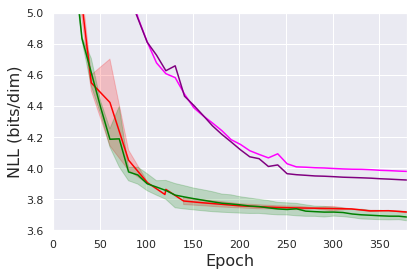

In [35]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

sns_plot = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=10, stop_point=stop_point_info_bs8k, color='green')
sns_plot = plot_line(file_names_ccnf_bl_bs8k, keys_ccnf_bl_bs8k, id_ccnf_bl_bs8k, stride=10, stop_point=stop_point_ccnf_bl_bs8k, color='magenta')
sns_plot = plot_line(file_names_info_bl_bs8k, keys_info_bl_bs8k, id_info_bl_bs8k, stride=10, stop_point=stop_point_info_bl_bs8k, color='purple')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(3.6,5.0)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [100]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nll_marginal_test_large_batches_methods.pdf'


# # bs900
# file_names_bs900 = ['./figures_neurips/result_data_published/run-900_run1_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run2_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run3_error_validation-tag-error.json']
# keys_bs900 = ['run1','run2','run3']
# id_bs900 = 'C-FFJO (baseline)'
# stop_point_bs900 = 500

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_nll_marginal_validation-tag-nll_marginal.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_nll_marginal_validation-tag-nll_marginal.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF'
stop_point_ccnf_bs8k = 500

# bs8k_mc
file_names_info_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-1_nll_marginal_validation-tag-nll_marginal.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-2_nll_marginal_validation-tag-nll_marginal.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-3_nll_marginal_validation-tag-nll_marginal.json',]
keys_info_bs8k = ['run1','run2','run3']
id_info_bs8k = 'InfoCNF'
stop_point_info_bs8k = 500

# bs8k_baseline_ccnf
file_names_ccnf_bl_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-base-1_nll_marginal_validation-tag-nll_marginal.json',]
keys_ccnf_bl_bs8k = ['run1',]
id_ccnf_bl_bs8k = 'CCNF without large lr \n and adjusted tolerance'
stop_point_ccnf_bl_bs8k = 500

# bs8k_baseline_ccnf
file_names_info_bl_bs8k = ['./figures_neurips/result_data_published/run-8k-info-drop-base-1_nll_marginal_validation-tag-nll_marginal.json',]
keys_info_bl_bs8k = ['run1',]
id_info_bl_bs8k = 'InfoCNF without large lr \n and adjusted tolerance'
stop_point_info_bl_bs8k = 500

# file_names_gate_std30_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std30-1_error_validation-tag-error.json',
#                         './figures_neurips/result_data_published/run-8k-gatecnf-drop-std30-2_error_validation-tag-error.json',
#                         './figures_neurips/result_data_published/run-8k-gatecnf-drop-std30-3_error_validation-tag-error.json',]
# keys_gate_std30_bs8k = ['run1','run2','run3']
# id_gate_std30_bs8k = 'Gated InfoCNF'
# stop_point_std30_gate_bs8k = 500

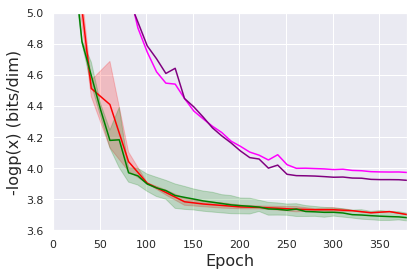

In [101]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

sns_plot = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=10, stop_point=stop_point_info_bs8k, color='green')
sns_plot = plot_line(file_names_ccnf_bl_bs8k, keys_ccnf_bl_bs8k, id_ccnf_bl_bs8k, stride=10, stop_point=stop_point_ccnf_bl_bs8k, color='magenta')
sns_plot = plot_line(file_names_info_bl_bs8k, keys_info_bl_bs8k, id_info_bl_bs8k, stride=10, stop_point=stop_point_info_bl_bs8k, color='purple')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('-logp(x) (bits/dim)', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(3.6,5.0)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [36]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nfe_large_batches_methods.pdf'


# # bs900
# file_names_bs900 = ['./figures_neurips/result_data_published/run-900_run1_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run2_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run3_error_validation-tag-error.json']
# keys_bs900 = ['run1','run2','run3']
# id_bs900 = 'C-FFJO (baseline)'
# stop_point_bs900 = 500

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_nfe_train_epoch-tag-nfe.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF'
stop_point_ccnf_bs8k = 500

# bs8k_mc
file_names_info_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-1_nfe_train_epoch-tag-nfe.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-2_nfe_train_epoch-tag-nfe.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-3_nfe_train_epoch-tag-nfe.json',]
keys_info_bs8k = ['run1','run2','run3']
id_info_bs8k = 'InfoCNF'
stop_point_info_bs8k = 500

# bs8k_baseline_ccnf
file_names_ccnf_bl_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-baseline-1_nfe_train_epoch-tag-nfe.json',]
keys_ccnf_bl_bs8k = ['run1',]
id_ccnf_bl_bs8k = 'CCNF without large lr \n and adjusted tolerance'
stop_point_ccnf_bl_bs8k = 500

# bs8k_baseline_ccnf
file_names_info_bl_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-baseline-1_nfe_train_epoch-tag-nfe.json',]
keys_info_bl_bs8k = ['run1',]
id_info_bl_bs8k = 'InfoCNF without large lr \n and adjusted tolerance'
stop_point_info_bl_bs8k = 500

# file_names_gate_std30_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std30-1_error_validation-tag-error.json',
#                         './figures_neurips/result_data_published/run-8k-gatecnf-drop-std30-2_error_validation-tag-error.json',
#                         './figures_neurips/result_data_published/run-8k-gatecnf-drop-std30-3_error_validation-tag-error.json',]
# keys_gate_std30_bs8k = ['run1','run2','run3']
# id_gate_std30_bs8k = 'Gated InfoCNF'
# stop_point_std30_gate_bs8k = 500

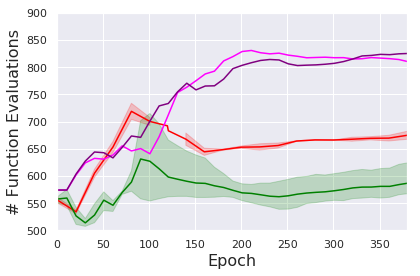

In [40]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

sns_plot = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=10, stop_point=stop_point_info_bs8k, color='green')
sns_plot = plot_line(file_names_ccnf_bl_bs8k, keys_ccnf_bl_bs8k, id_ccnf_bl_bs8k, stride=10, stop_point=stop_point_ccnf_bl_bs8k, color='magenta')
sns_plot = plot_line(file_names_info_bl_bs8k, keys_info_bl_bs8k, id_info_bl_bs8k, stride=10, stop_point=stop_point_info_bl_bs8k, color='purple')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('# Function Evaluations', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(500,900)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [45]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'

# gate 8k
file_names_gate_std15_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_error_validation-tag-error.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF - large batch'
stop_point_std15_gate_bs8k = 500

# 900 baseline
file_names_ccnf_bs900 = ['./figures_neurips/result_data_published/run-900-ccnf-drop-1_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-2_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-3_error_validation-tag-error.json',]
keys_ccnf_bs900 = ['run1','run2','run3']
id_ccnf_bs900 = 'CCNF - small batch (baseline)'
stop_point_ccnf_bs900 = 500

# gate 900
file_names_gate_bs900 = ['./figures_neurips/result_data_published/run-900-gatecnf-2_error_validation-tag-error.json',
                           './figures_neurips/result_data_published/run-900-gatecnf-3_error_validation-tag-error.json',]
keys_gate_bs900 = ['run1','run2','run3']
id_gate_bs900 = 'Gated InfoCNF - small batch'
stop_point_gate_bs900 = 500


###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

# gate 8k
file_names_gate_std15_bs8k_t = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_nfe_train_epoch-tag-nfe.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF - large batch'
stop_point_std15_gate_bs8k = 500

# 900 baseline
file_names_ccnf_bs900_t = ['./figures_neurips/result_data_published/run-900-ccnf-drop-1_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-2_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-3_nfe_train_epoch-tag-nfe.json',]
keys_ccnf_bs900 = ['run1','run2','run3']
id_ccnf_bs900 = 'CCNF - small batch (baseline)'
stop_point_ccnf_bs900 = 500

# gate 900
file_names_gate_bs900_t = ['./figures_neurips/result_data_published/run-900-gatecnf-2_nfe_train_epoch-tag-nfe.json',
                           './figures_neurips/result_data_published/run-900-gatecnf-3_nfe_train_epoch-tag-nfe.json',]
keys_gate_bs900 = ['run1','run2','run3']
id_gate_bs900 = 'Gated InfoCNF - small batch'
stop_point_gate_bs900 = 500

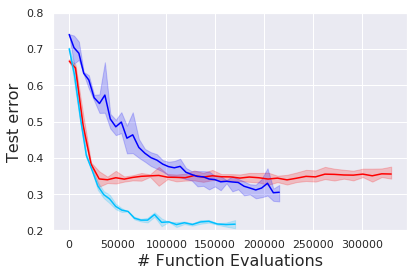

In [46]:
sns.set(style="darkgrid")
def make_dataframe_loss_vs_time(filenames_time, filenames_loss, keys, trial_id, color=None, stride = 1, stop_point=500):
    dat_t = 0
    stop_point_t = 500
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
    
        stop_point_t = min(stop_point_t, len(dat_tf))
        
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
        try:
            dat_t = dat_t + np.array(dat_tf[0:stop_point_t])
        except:
            print(fnt)
            Tracer()()
    
    dat_t /= len(filenames_time)
    dat_t = list(np.cumsum(dat_t[:,2]))
    stop_point_t = min(stop_point, len(dat_t))
    
    df = []
    stop_point_l = 500
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        stop_point_l = min(stop_point_l, stop_point_t, len(dat_l))
        
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        dat_l = dat_l[:stop_point_l:stride]
        df_l  = pd.DataFrame(dat_l, columns=['wall_time', 'step', 'value'])
        try:
            df_l['step_time'] = dat_t[:stop_point_l:stride]
        except:
            print(fnl)
            Tracer()()
        df.append(df_l)
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step_time", y="value", data=df, label=trial_id, color=color)
    
    return sns_plot

save_name = 'test_error_vs_time_cond_cifar_bs900_8k.pdf'

sns_plot = make_dataframe_loss_vs_time(file_names_ccnf_bs900_t, file_names_ccnf_bs900, keys_ccnf_bs900, id_ccnf_bs900, stride = 10, stop_point=stop_point_ccnf_bs900, color='red')
sns_plot = make_dataframe_loss_vs_time(file_names_gate_bs900_t, file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride = 10, stop_point=stop_point_gate_bs900, color='deepskyblue')
sns_plot = make_dataframe_loss_vs_time(file_names_gate_std15_bs8k_t, file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride = 10, stop_point=stop_point_std15_gate_bs8k, color='blue')

sns_plot.set_xlabel('# Function Evaluations', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)
sns_plot.set_ylim(0.2,0.8)
sns_plot.legend().set_visible(False)
#sns_plot.set_xlim(0.0,200000)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [47]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'

# gate 8k
file_names_gate_std15_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF - large batch'
stop_point_std15_gate_bs8k = 500

# 900 baseline
file_names_ccnf_bs900 = ['./figures_neurips/result_data_published/run-900-ccnf-drop-1_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-2_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_ccnf_bs900 = ['run1','run2','run3']
id_ccnf_bs900 = 'CCNF - small batch (baseline)'
stop_point_ccnf_bs900 = 500

# gate 900
file_names_gate_bs900 = ['./figures_neurips/result_data_published/run-900-gatecnf-2_bits_per_dim_validation-tag-bits_per_dim.json',
                           './figures_neurips/result_data_published/run-900-gatecnf-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_gate_bs900 = ['run1','run2','run3']
id_gate_bs900 = 'Gated InfoCNF - small batch'
stop_point_gate_bs900 = 500


###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

# gate 8k
file_names_gate_std15_bs8k_t = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_nfe_train_epoch-tag-nfe.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF - large batch'
stop_point_std15_gate_bs8k = 500

# 900 baseline
file_names_ccnf_bs900_t = ['./figures_neurips/result_data_published/run-900-ccnf-drop-1_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-2_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-3_nfe_train_epoch-tag-nfe.json',]
keys_ccnf_bs900 = ['run1','run2','run3']
id_ccnf_bs900 = 'CCNF - small batch (baseline)'
stop_point_ccnf_bs900 = 500

# gate 900
file_names_gate_bs900_t = ['./figures_neurips/result_data_published/run-900-gatecnf-2_nfe_train_epoch-tag-nfe.json',
                           './figures_neurips/result_data_published/run-900-gatecnf-3_nfe_train_epoch-tag-nfe.json',]
keys_gate_bs900 = ['run1','run2','run3']
id_gate_bs900 = 'Gated InfoCNF - small batch'
stop_point_gate_bs900 = 500

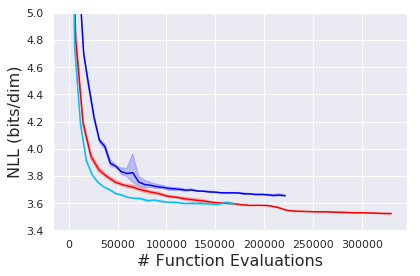

In [48]:
sns.set(style="darkgrid")
def make_dataframe_loss_vs_time(filenames_time, filenames_loss, keys, trial_id, color=None, stride = 1, stop_point=500):
    dat_t = 0
    stop_point_t = 500
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
    
        stop_point_t = min(stop_point_t, len(dat_tf))
        
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
        try:
            dat_t = dat_t + np.array(dat_tf[0:stop_point_t])
        except:
            print(fnt)
            Tracer()()
    
    dat_t /= len(filenames_time)
    dat_t = list(np.cumsum(dat_t[:,2]))
    stop_point_t = min(stop_point, len(dat_t))
    
    df = []
    stop_point_l = 500
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        stop_point_l = min(stop_point_l, stop_point_t, len(dat_l))
        
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        dat_l = dat_l[:stop_point_l:stride]
        df_l  = pd.DataFrame(dat_l, columns=['wall_time', 'step', 'value'])
        try:
            df_l['step_time'] = dat_t[:stop_point_l:stride]
        except:
            print(fnl)
            Tracer()()
        df.append(df_l)
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step_time", y="value", data=df, label=trial_id, color=color)
    
    return sns_plot

save_name = 'test_nll_vs_time_cond_cifar_bs900_8k.pdf'

sns_plot = make_dataframe_loss_vs_time(file_names_ccnf_bs900_t, file_names_ccnf_bs900, keys_ccnf_bs900, id_ccnf_bs900, stride = 10, stop_point=stop_point_ccnf_bs900, color='red')
sns_plot = make_dataframe_loss_vs_time(file_names_gate_bs900_t, file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride = 10, stop_point=stop_point_gate_bs900, color='deepskyblue')
sns_plot = make_dataframe_loss_vs_time(file_names_gate_std15_bs8k_t, file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride = 10, stop_point=stop_point_std15_gate_bs8k, color='blue')

sns_plot.set_xlabel('# Function Evaluations', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_ylim(3.4,5.0)
sns_plot.legend().set_visible(False)
#sns_plot.set_xlim(0.0,200000)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [71]:
###############################################################
#### Test error for conditional FFJORD on MNIST ####
###############################################################

save_dir = './figures'


# bs900_drop
file_names_bs900_ccnf = ['./figures/result_data/run-bs900_cond_drop_run1_error_validation-tag-error.json',
                          './figures/result_data/run-bs900_cond_drop_run2_error_validation-tag-error.json',]
#                           './figures/result_data/run-bs900_cond_drop_run3_error_validation-tag-error.json',]
keys_bs900_ccnf = ['run1','run2']
id_bs900_ccnf = 'CCNF (baseline)'
stop_point_bs900_ccnf = 500


# bs900_split_drop
file_names_bs900_info = ['./figures/result_data/run-bs900_cond_split_0_25_drop_run1_error_validation-tag-error.json',
                                    ]
keys_bs900_info = ['run1',]
id_bs900_info = 'InfoCNF'
stop_point_bs900_info = 500

In [72]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
        Tracer()()
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_min

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

# sns_plot = plot_line(file_names_ccnf_bs900, keys_ccnf_bs900, id_ccnf_bs900, stride=10, stop_point=stop_point_ccnf_bs900, color='red')
# sns_plot = plot_line(file_names_info_bs900, keys_info_bs900, id_info_bs900, stride=10, stop_point=stop_point_info_bs900, color='green')
# sns_plot = plot_line(file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride=10, stop_point=stop_point_gate_bs900, color='blue')

sns_plot, df_min_ccnf = plot_line(file_names_bs900_ccnf, keys_bs900_ccnf, id_bs900_ccnf, stride=1, stop_point=stop_point_bs900_ccnf, color='red')
sns_plot, df_min_info = plot_line(file_names_bs900_info, keys_bs900_info, id_bs900_info, stride=1, stop_point=stop_point_bs900_info, color='green')

print('ccnf')
print(np.mean(df_min_ccnf) * 100)
print(np.std(df_min_ccnf) * 100)

print('info')
print(np.mean(df_min_info) * 100)
print(np.std(df_min_info) * 100)


sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)
# sns_plot.set_xlim(0,380)
# sns_plot.set_ylim(0.2,0.6)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `Tracer` is deprecated since version 5.1, directly use `IPython.core.debugger.Pdb.set_trace()`
  if __name__ == '__main__':


> <ipython-input-72-d40331f52dc4>(5)plot_line()
      3     df = []
      4     df_min = []
----> 5     for fn in file_names:
      6         df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
      7         stop_indx = min(500, len(df[-1]['value']))



ipdb>  np.argmin(df[-1]['value'])


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


244


ipdb>  quit


Exiting Debugger.


In [117]:
###############################################################
#### HEREHEREHERE Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'error_test_cond_cifar_bs8k_2x.pdf'


# # bs900
# file_names_bs900 = ['./figures_neurips/result_data_published/run-900_run1_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run2_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run3_error_validation-tag-error.json']
# keys_bs900 = ['run1','run2','run3']
# id_bs900 = 'C-FFJO (baseline)'
# stop_point_bs900 = 500

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_error_validation-tag-error.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF (baseline)'
stop_point_ccnf_bs8k = 500


# b8k_mc_drop
file_names_gate_std15_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_error_validation-tag-error.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF'
stop_point_std15_gate_bs8k = 500

file_names_gate_std15_2x_bs8k = ['./figures_neurips/result_data_published/run-8k-4block-gatecnf-std15-2_error_validation-tag-error.json',]
keys_gate_std15_2x_bs8k = ['run1',]
id_gate_std15_2x_bs8k = 'Gated InfoCNF 2x'
stop_point_std15_2x_gate_bs8k = 500

ccnf
38.50499987602234
0.8850008249282837
gate
29.11666731039683
1.8353261469713773
gate 2x
28.679999709129333
0.0


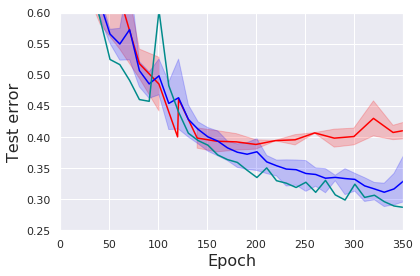

In [118]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_min

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

# sns_plot, _ = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
# sns_plot, _ = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=10, stop_point=stop_point_info_bs8k, color='green')
# sns_plot, _ = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=10, stop_point=stop_point_std15_gate_bs8k, color='blue')

sns_plot, df_min_ccnf = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot, df_min_gate = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=10, stop_point=stop_point_std15_gate_bs8k, color='blue')
sns_plot, df_min_gate_2x = plot_line(file_names_gate_std15_2x_bs8k, keys_gate_std15_2x_bs8k, id_gate_std15_2x_bs8k, stride=10, stop_point=stop_point_std15_2x_gate_bs8k, color='chocolate')

print('ccnf')
print(np.mean(df_min_ccnf) * 100)
print(np.std(df_min_ccnf) * 100)

print('gate')
print(np.mean(df_min_gate) * 100)
print(np.std(df_min_gate) * 100)

print('gate 2x')
print(np.mean(df_min_gate_2x) * 100)
print(np.std(df_min_gate_2x) * 100)


sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)
sns_plot.set_xlim(0,350)
sns_plot.set_ylim(0.25,0.6)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [115]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nll_test_cond_cifar_bs8k_2x.pdf'


# # bs900
# file_names_bs900 = ['./figures_neurips/result_data_published/run-900_run1_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run2_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run3_error_validation-tag-error.json']
# id_bs900 = 'C-FFJO (baseline)'
# stop_point_bs900 = 500

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_bits_per_dim_validation-tag-bits_per_dim.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF (baseline)'
stop_point_ccnf_bs8k = 500


# b8k_mc_drop
file_names_gate_std15_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF'
stop_point_std15_gate_bs8k = 500

file_names_gate_std15_2x_bs8k = ['./figures_neurips/result_data_published/run-8k-4block-gatecnf-std15-2_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_gate_std15_2x_bs8k = ['run1',]
id_gate_std15_2x_bs8k = 'Gated InfoCNF 2x'
stop_point_std15_2x_gate_bs8k = 500

ccnf
3.7111737728118896
0.0065839290618896484
gate
3.6467334429423013
0.010929291194653953
gate 2x
3.625685214996338
0.0


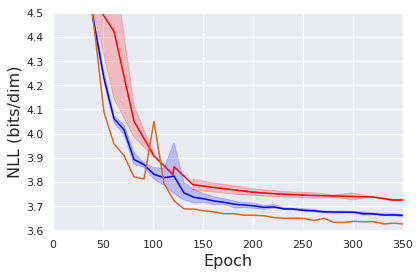

In [116]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(350, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_min

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

# sns_plot, _ = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
# sns_plot, _ = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=10, stop_point=stop_point_info_bs8k, color='green')
# sns_plot, _ = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=10, stop_point=stop_point_std15_gate_bs8k, color='blue')

sns_plot, df_min_ccnf = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot, df_min_gate = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=10, stop_point=stop_point_std15_gate_bs8k, color='blue')
sns_plot, df_min_gate_2x = plot_line(file_names_gate_std15_2x_bs8k, keys_gate_std15_2x_bs8k, id_gate_std15_2x_bs8k, stride=10, stop_point=stop_point_std15_2x_gate_bs8k, color='chocolate')


print('ccnf')
print(np.mean(df_min_ccnf))
print(np.std(df_min_ccnf))

print('gate')
print(np.mean(df_min_gate))
print(np.std(df_min_gate))

print('gate 2x')
print(np.mean(df_min_gate_2x))
print(np.std(df_min_gate_2x))


sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_xlim(0,350)
sns_plot.set_ylim(3.6,4.5)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [119]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nfe_cond_cifar_bs8k_2x.pdf'


# # bs900
# file_names_bs900 = ['./figures_neurips/result_data_published/run-900_run1_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run2_error_validation-tag-error.json',
#                    './figures_neurips/result_data_published/run-900_run3_error_validation-tag-error.json']
# keys_bs900 = ['run1','run2','run3']
# id_bs900 = 'C-FFJO (baseline)'
# stop_point_bs900 = 500

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_nfe_train_epoch-tag-nfe.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF (baseline)'
stop_point_ccnf_bs8k = 500

# b8k_mc_drop
file_names_gate_std15_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_nfe_train_epoch-tag-nfe.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF'
stop_point_std15_gate_bs8k = 500

file_names_gate_std15_2x_bs8k = ['./figures_neurips/result_data_published/run-8k-4block-gatecnf-std15-2_nfe_train_epoch-tag-nfe.json',]
keys_gate_std15_2x_bs8k = ['run1',]
id_gate_std15_2x_bs8k = 'Gated InfoCNF 2x'
stop_point_std15_2x_gate_bs8k = 500

ccnf
660.7110881347656
4.699332641601586
gate
589.6851783619107
11.197698295159665
gate 2x
1057.9767468157977
0.0


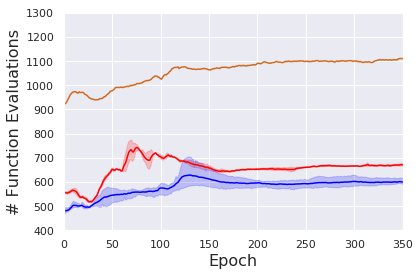

In [123]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_mean = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_mean.append(np.mean(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_mean

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

# sns_plot, _ = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
# sns_plot, _ = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=20, stop_point=stop_point_info_bs8k, color='green')
# sns_plot, _ = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=20, stop_point=stop_point_std15_gate_bs8k, color='blue')

sns_plot, df_mean_ccnf = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=1, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot, df_mean_gate = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=1, stop_point=stop_point_std15_gate_bs8k, color='blue')
sns_plot, df_mean_gate_2x = plot_line(file_names_gate_std15_2x_bs8k, keys_gate_std15_2x_bs8k, id_gate_std15_2x_bs8k, stride=1, stop_point=stop_point_std15_2x_gate_bs8k, color='chocolate')


print('ccnf')
print(np.mean(df_mean_ccnf))
print(np.std(df_mean_ccnf))

print('gate')
print(np.mean(df_mean_gate))
print(np.std(df_mean_gate))

print('gate 2x')
print(np.mean(df_mean_gate_2x))
print(np.std(df_mean_gate_2x))


sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('# Function Evaluations', fontsize = 16)
sns_plot.set_xlim(0,350)
sns_plot.set_ylim(400,1300)
sns_plot.legend().set_visible(False)
# sns_plot.set_ylim(0.27,0.6)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Test error for conditional FFJORD on MNIST ####
###############################################################

save_dir = './figures'


# bs900_drop
file_names_bs900_ccnf = ['./figures/result_data/run-bs900_cond_drop_run1_error_validation-tag-error.json',
                          './figures/result_data/run-bs900_cond_drop_run2_error_validation-tag-error.json',]
#                           './figures/result_data/run-bs900_cond_drop_run3_error_validation-tag-error.json',]
keys_bs900_ccnf = ['run1','run2']
id_bs900_ccnf = 'CCNF (baseline)'
stop_point_bs900_ccnf = 500


# bs900_split_drop
file_names_bs900_info = ['./figures/result_data/run-bs900_cond_split_0_5_drop_run1_error_validation-tag-error.json',
                                    './figures/result_data/run-bs900_cond_split_0_5_drop_run2_error_validation-tag-error.json',]
keys_bs900_info = ['run1','run2']
id_bs900_info = 'InfoCNF'
stop_point_bs900_info = 500

In [82]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'nll_test_cond_cifar_bs8k_compare_baseline.pdf'

# C-FFJORD 8k bl lr=0.01
file_names_bs8k_bl_llr = ['./figures/result_data_published/run-8K_drop_0_5_bl_lr_0_01_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs8k_bl_llr = ['run1']
id_bs8k_bl_llr = 'C-FFJORD + large lr'
stop_point_bs8k_bl_llr = 500

# C-FFJORD 8k bl
file_names_bs8k_bl = ['./figures/result_data_published/run-8K_drop_0_5_bl_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs8k_bl = ['run1']
id_bs8k_bl = 'C-FFJORD (baseline)'
stop_point_bs8k_bl = 500


# C-FFJORD 8k drop
file_names_bs8k = ['./figures/result_data_published/run-8K_drop_0_5_run1_bits_per_dim_validation-tag-bits_per_dim.json',
                  './figures/result_data_published/run-8K_drop_0_5_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                  './figures/result_data_published/run-8K_drop_0_5_run3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs8k = ['run1','run2','run3']
id_bs8k = 'C-FFJORD + large lr + high error tol'
stop_point_bs8k = 500

# MC-FFJORD 8k bl lr=0.01
file_names_mc_bs8k_bl_llr = ['./figures/result_data_published/run-8K_st_0_5_drop_0_5_bl_lr_0_01_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_mc_bs8k_bl_llr = ['run1']
id_mc_bs8k_bl_llr = 'MC-FFJORD + large lr'
stop_point_mc_bs8k_bl_llr = 500

# MC-FFJORD 8k bl
file_names_mc_bs8k_bl = ['./figures/result_data_published/run-8K_st_0_5_drop_0_5_bl_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_mc_bs8k_bl = ['run1']
id_mc_bs8k_bl = 'MC-FFJORD (baseline)'
stop_point_mc_bs8k_bl = 500


# MC-FFJORD 8k drop
file_names_mc_bs8k = ['./figures/result_data_published/run-8K_st_0_5_drop_0_5_run1_bits_per_dim_validation-tag-bits_per_dim.json',
                  './figures/result_data_published/run-8K_st_0_5_drop_0_5_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                  './figures/result_data_published/run-8K_st_0_5_drop_0_5_run3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_mc_bs8k = ['run1','run2','run3']
id_mc_bs8k = 'MC-FFJORD + large lr + high error tol'
stop_point_mc_bs8k = 500



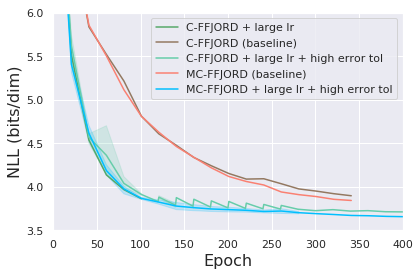

In [83]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

# sns_plot = plot_line(file_names_bs8k_bl_llr, keys_bs8k_bl_llr, id_bs8k_bl_llr, stop_point=stop_point_bs8k_bl_llr, stride=20)
# sns_plot = plot_line(file_names_bs8k_bl, keys_bs8k_bl, id_bs8k_bl, stop_point=stop_point_bs8k_bl, stride=20)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stop_point=stop_point_bs8k, stride=20, color='MediumAquamarine')

#sns_plot = plot_line(file_names_mc_bs8k_bl_llr, keys_mc_bs8k_bl_llr, id_mc_bs8k_bl_llr, stop_point=stop_point_mc_bs8k_bl_llr, stride=20)
sns_plot = plot_line(file_names_mc_bs8k_bl, keys_mc_bs8k_bl, id_mc_bs8k_bl, stop_point=stop_point_mc_bs8k_bl, stride=20, color='Salmon')
sns_plot = plot_line(file_names_mc_bs8k, keys_mc_bs8k, id_mc_bs8k, stop_point=stop_point_mc_bs8k, stride=20, color='DeepSkyBlue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_ylim(3.5,6.0)
sns_plot.set_xlim(0,400)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [39]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'error_test_cond_cifar_bs8k_compare_baseline.pdf'

# MC-FFJORD 8k bl
file_names_mc_bs8k_bl = ['./figures/result_data_published/run-8K_st_0_5_drop_0_5_bl_run1_error_validation-tag-error.json',]
keys_mc_bs8k_bl = ['run1']
id_mc_bs8k_bl = 'MC-FFJORD (baseline)'
stop_point_mc_bs8k_bl = 500


# MC-FFJORD 8k drop
file_names_mc_bs8k = ['./figures/result_data_published/run-8K_st_0_5_drop_0_5_run1_error_validation-tag-error.json',
                  './figures/result_data_published/run-8K_st_0_5_drop_0_5_run2_error_validation-tag-error.json',
                  './figures/result_data_published/run-8K_st_0_5_drop_0_5_run3_error_validation-tag-error.json',]
keys_mc_bs8k = ['run1','run2','run3']
id_mc_bs8k = 'MC-FFJORD + large lr + high error tol'
stop_point_mc_bs8k = 500



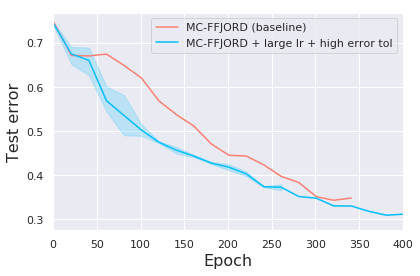

In [40]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

# sns_plot = plot_line(file_names_bs8k_bl_llr, keys_bs8k_bl_llr, id_bs8k_bl_llr, stop_point=stop_point_bs8k_bl_llr, stride=20)
# sns_plot = plot_line(file_names_bs8k_bl, keys_bs8k_bl, id_bs8k_bl, stop_point=stop_point_bs8k_bl, stride=20)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stop_point=stop_point_bs8k, stride=20, color='MediumAquamarine')

#sns_plot = plot_line(file_names_mc_bs8k_bl_llr, keys_mc_bs8k_bl_llr, id_mc_bs8k_bl_llr, stop_point=stop_point_mc_bs8k_bl_llr, stride=20)
sns_plot = plot_line(file_names_mc_bs8k_bl, keys_mc_bs8k_bl, id_mc_bs8k_bl, stop_point=stop_point_mc_bs8k_bl, stride=20, color='Salmon')
sns_plot = plot_line(file_names_mc_bs8k, keys_mc_bs8k, id_mc_bs8k, stop_point=stop_point_mc_bs8k, stride=20, color='DeepSkyBlue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)
sns_plot.set_xlim(0,400)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [41]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'error_test_cond_cifar_bs900.pdf'


# bs900
file_names_bs900 = ['./figures/result_data_published/run-900_run1_error_validation-tag-error.json',
                   './figures/result_data_published/run-900_run2_error_validation-tag-error.json',
                   './figures/result_data_published/run-900_run3_error_validation-tag-error.json']
keys_bs900 = ['run1','run2','run3']
id_bs900 = 'C-FFJORD (baseline)'
stop_point_bs900 = 500

# bs900_drop
file_names_bs900_drop = ['./figures/result_data_published/run-900_drop_0_5_run1_error_validation-tag-error.json',
                        './figures/result_data_published/run-900_drop_0_5_run2_error_validation-tag-error.json',
                        './figures/result_data_published/run-900_drop_0_5_run3_error_validation-tag-error.json',]
keys_bs900_drop = ['run1','run2','run3']
id_bs900_drop = 'C-FFJORD + dropout'
stop_point_bs900_drop = 500

# bs900_mc
file_names_mc_bs900 = ['./figures/result_data_published/run-900_st_0_5_run1_error_validation-tag-error.json',
                      './figures/result_data_published/run-900_st_0_5_run2_error_validation-tag-error.json',
                      './figures/result_data_published/run-900_st_0_5_run3_error_validation-tag-error.json',]
keys_mc_bs900 = ['run1','run2','run3']
id_mc_bs900 = 'MC-FFJORD'
stop_point_mc_bs900 = 500

# bs900_mc_drop
file_names_mc_bs900_drop = ['./figures/result_data_published/run-900_st_0_5_drop_0_5_run1_error_validation-tag-error.json',
                           './figures/result_data_published/run-900_st_0_5_drop_0_5_run2_error_validation-tag-error.json',
                           './figures/result_data_published/run-900_st_0_5_drop_0_5_run3_error_validation-tag-error.json',]
keys_mc_bs900_drop = ['run1','run2','run3']
id_mc_bs900_drop = 'MC-FFJORD + dropout'
stop_point_mc_bs900_drop = 500

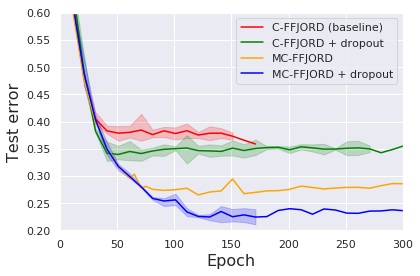

In [49]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

sns_plot = plot_line(file_names_bs900, keys_bs900, id_bs900, stride=10, stop_point=stop_point_bs900, color='red')
sns_plot = plot_line(file_names_bs900_drop, keys_bs900_drop, id_bs900_drop, stride=10, stop_point=stop_point_bs900_drop, color='green')
sns_plot = plot_line(file_names_mc_bs900, keys_mc_bs900, id_mc_bs900, stride=10, stop_point=stop_point_mc_bs900, color='orange')
sns_plot = plot_line(file_names_mc_bs900_drop, keys_mc_bs900_drop, id_mc_bs900_drop, stride=10, stop_point=stop_point_mc_bs900_drop, color='blue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)
sns_plot.set_xlim(0,300)
sns_plot.set_ylim(0.2,0.6)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [6]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'nll_test_cond_cifar_bs900.pdf'


# bs900
file_names_bs900 = ['./figures/result_data_published/run-900_run1_bits_per_dim_validation-tag-bits_per_dim.json',
                   './figures/result_data_published/run-900_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                   './figures/result_data_published/run-900_run3_bits_per_dim_validation-tag-bits_per_dim.json']
keys_bs900 = ['run1','run2','run3']
id_bs900 = 'C-FFJORD (baseline)'
stop_point_bs900 = 500

# bs900_drop
file_names_bs900_drop = ['./figures/result_data_published/run-900_drop_0_5_run1_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures/result_data_published/run-900_drop_0_5_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures/result_data_published/run-900_drop_0_5_run3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs900_drop = ['run1','run2','run3']
id_bs900_drop = 'C-FFJORD + dropout'
stop_point_bs900_drop = 500

# bs900_mc
file_names_mc_bs900 = ['./figures/result_data_published/run-900_st_0_5_run1_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures/result_data_published/run-900_st_0_5_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures/result_data_published/run-900_st_0_5_run3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_mc_bs900 = ['run1','run2','run3']
id_mc_bs900 = 'MC-FFJORD'
stop_point_mc_bs900 = 500

# bs900_mc_drop
file_names_mc_bs900_drop = ['./figures/result_data_published/run-900_st_0_5_drop_0_5_run1_bits_per_dim_validation-tag-bits_per_dim.json',
                           './figures/result_data_published/run-900_st_0_5_drop_0_5_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                           './figures/result_data_published/run-900_st_0_5_drop_0_5_run3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_mc_bs900_drop = ['run1','run2','run3']
id_mc_bs900_drop = 'MC-FFJORD + dropout'
stop_point_mc_bs900_drop = 500

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


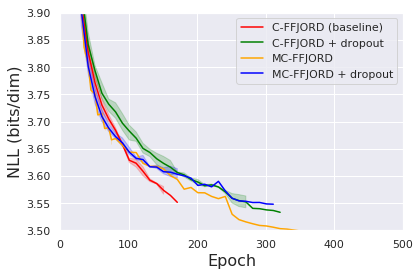

In [7]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

sns_plot = plot_line(file_names_bs900, keys_bs900, id_bs900, stride=10, stop_point=stop_point_bs900, color='red')
sns_plot = plot_line(file_names_bs900_drop, keys_bs900_drop, id_bs900_drop, stride=10, stop_point=stop_point_bs900_drop, color='green')
sns_plot = plot_line(file_names_mc_bs900, keys_mc_bs900, id_mc_bs900, stride=10, stop_point=stop_point_mc_bs900, color='orange')
sns_plot = plot_line(file_names_mc_bs900_drop, keys_mc_bs900_drop, id_mc_bs900_drop, stride=10, stop_point=stop_point_mc_bs900_drop, color='blue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_xlim(0,500)
sns_plot.set_ylim(3.5,3.9)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [53]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'nfe_cond_cifar_bs900.pdf'


# bs900
file_names_bs900 = ['./figures/result_data_published/run-900_run1_nfe_train_epoch-tag-nfe.json',
                   './figures/result_data_published/run-900_run2_nfe_train_epoch-tag-nfe.json',
                   './figures/result_data_published/run-900_run3_nfe_train_epoch-tag-nfe.json']
keys_bs900 = ['run1','run2','run3']
id_bs900 = 'C-FFJORD (baseline)'
stop_point_bs900 = 500

# bs900_drop
file_names_bs900_drop = ['./figures/result_data_published/run-900_drop_0_5_run1_nfe_train_epoch-tag-nfe.json',
                        './figures/result_data_published/run-900_drop_0_5_run2_nfe_train_epoch-tag-nfe.json',
                        './figures/result_data_published/run-900_drop_0_5_run3_nfe_train_epoch-tag-nfe.json',]
keys_bs900_drop = ['run1','run2','run3']
id_bs900_drop = 'C-FFJORD + dropout'
stop_point_bs900_drop = 500

# bs900_mc
file_names_mc_bs900 = ['./figures/result_data_published/run-900_st_0_5_run1_nfe_train_epoch-tag-nfe.json',
                      './figures/result_data_published/run-900_st_0_5_run2_nfe_train_epoch-tag-nfe.json',
                      './figures/result_data_published/run-900_st_0_5_run3_nfe_train_epoch-tag-nfe.json',]
keys_mc_bs900 = ['run1','run2','run3']
id_mc_bs900 = 'MC-FFJORD'
stop_point_mc_bs900 = 500

# bs900_mc_drop
file_names_mc_bs900_drop = ['./figures/result_data_published/run-900_st_0_5_drop_0_5_run1_nfe_train_epoch-tag-nfe.json',
                           './figures/result_data_published/run-900_st_0_5_drop_0_5_run2_nfe_train_epoch-tag-nfe.json',
                           './figures/result_data_published/run-900_st_0_5_drop_0_5_run3_nfe_train_epoch-tag-nfe.json',]
keys_mc_bs900_drop = ['run1','run2','run3']
id_mc_bs900_drop = 'MC-FFJORD + dropout'
stop_point_mc_bs900_drop = 500

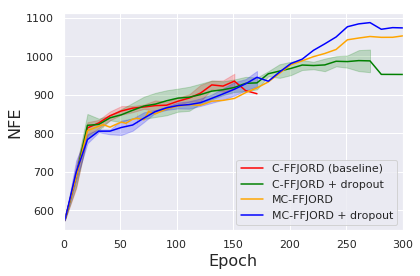

In [54]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

sns_plot = plot_line(file_names_bs900, keys_bs900, id_bs900, stride=10, stop_point=stop_point_bs900, color='red')
sns_plot = plot_line(file_names_bs900_drop, keys_bs900_drop, id_bs900_drop, stride=10, stop_point=stop_point_bs900_drop, color='green')
sns_plot = plot_line(file_names_mc_bs900, keys_mc_bs900, id_mc_bs900, stride=10, stop_point=stop_point_mc_bs900, color='orange')
sns_plot = plot_line(file_names_mc_bs900_drop, keys_mc_bs900_drop, id_mc_bs900_drop, stride=10, stop_point=stop_point_mc_bs900_drop, color='blue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NFE', fontsize = 16)
sns_plot.set_xlim(0,300)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [76]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'error_test_cond_cifar_bs8k.pdf'


# bs8k
file_names_bs8k = ['./figures/result_data_published/run-8K_run1_error_validation-tag-error.json',]
keys_bs8k = ['run1']
id_bs8k = 'C-FFJORD (baseline)'
stop_point_bs8k = 500

# bs8k_drop
file_names_bs8k_drop = ['./figures/result_data_published/run-8K_drop_0_5_run1_error_validation-tag-error.json',
                        './figures/result_data_published/run-8K_drop_0_5_run2_error_validation-tag-error.json',]
keys_bs8k_drop = ['run1','run2']
id_bs8k_drop = 'C-FFJORD + dropout'
stop_point_bs8k_drop = 500

# bs8k_mc_drop
file_names_mc_bs8k_drop = ['./figures/result_data_published/run-8K_st_0_5_drop_0_5_run1_error_validation-tag-error.json',
                           './figures/result_data_published/run-8K_st_0_5_drop_0_5_run2_error_validation-tag-error.json',
                           './figures/result_data_published/run-8K_st_0_5_drop_0_5_run3_error_validation-tag-error.json',]
keys_mc_bs8k_drop = ['run1','run2','run3']
id_mc_bs8k_drop = 'MC-FFJORD + dropout'
stop_point_mc_bs8k_drop = 500

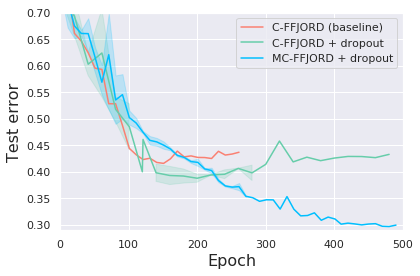

In [77]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=10, stop_point=stop_point_bs8k, color='Salmon')
sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=20, stop_point=stop_point_bs8k_drop, color='MediumAquamarine')
sns_plot = plot_line(file_names_mc_bs8k_drop, keys_mc_bs8k_drop, id_mc_bs8k_drop, stride=10, stop_point=stop_point_mc_bs8k_drop, color='DeepSkyBlue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)
sns_plot.set_xlim(0,500)
sns_plot.set_ylim(0.29,0.7)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [78]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'nll_test_cond_cifar_bs8k.pdf'


# bs8k
file_names_bs8k = ['./figures/result_data_published/run-8K_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs8k = ['run1']
id_bs8k = 'C-FFJORD (baseline)'
stop_point_bs8k = 500

# bs8k_drop
file_names_bs8k_drop = ['./figures/result_data_published/run-8K_drop_0_5_run1_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures/result_data_published/run-8K_drop_0_5_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                        ]
keys_bs8k_drop = ['run1','run2',]
id_bs8k_drop = 'C-FFJORD + dropout'
stop_point_bs8k_drop = 500

# bs8k_mc_drop
file_names_mc_bs8k_drop = ['./figures/result_data_published/run-8K_st_0_5_drop_0_5_run1_bits_per_dim_validation-tag-bits_per_dim.json',
                           './figures/result_data_published/run-8K_st_0_5_drop_0_5_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                           './figures/result_data_published/run-8K_st_0_5_drop_0_5_run3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_mc_bs8k_drop = ['run1','run2','run3']
id_mc_bs8k_drop = 'MC-FFJORD + dropout'
stop_point_mc_bs8k_drop = 500

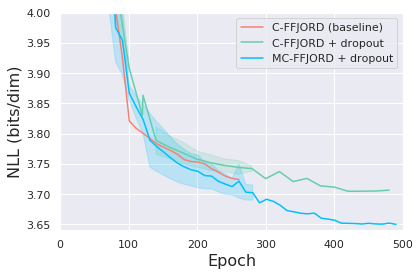

In [79]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=10, stop_point=stop_point_bs8k, color='Salmon')
sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=20, stop_point=stop_point_bs8k_drop, color='MediumAquamarine')
sns_plot = plot_line(file_names_mc_bs8k_drop, keys_mc_bs8k_drop, id_mc_bs8k_drop, stride=10, stop_point=stop_point_mc_bs8k_drop, color='DeepSkyBlue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_xlim(0,500)
sns_plot.set_ylim(3.64,4.0)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [80]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'nfe_cond_cifar_bs8k.pdf'


# bs8k
file_names_bs8k = ['./figures/result_data_published/run-8K_run1_nfe_train_epoch-tag-nfe.json',]
keys_bs8k = ['run1']
id_bs8k = 'C-FFJORD (baseline)'
stop_point_bs8k = 500

# bs8k_drop
file_names_bs8k_drop = ['./figures/result_data_published/run-8K_drop_0_5_run1_nfe_train_epoch-tag-nfe.json',
                        './figures/result_data_published/run-8K_drop_0_5_run2_nfe_train_epoch-tag-nfe.json',
                        ]
keys_bs8k_drop = ['run1','run2',]
id_bs8k_drop = 'C-FFJORD + dropout'
stop_point_bs8k_drop = 500

# bs8k_mc_drop
file_names_mc_bs8k_drop = ['./figures/result_data_published/run-8K_st_0_5_drop_0_5_run1_nfe_train_epoch-tag-nfe.json',
                           './figures/result_data_published/run-8K_st_0_5_drop_0_5_run2_nfe_train_epoch-tag-nfe.json',
                           './figures/result_data_published/run-8K_st_0_5_drop_0_5_run3_nfe_train_epoch-tag-nfe.json',]
keys_mc_bs8k_drop = ['run1','run2','run3']
id_mc_bs8k_drop = 'MC-FFJORD + dropout'
stop_point_mc_bs8k_drop = 500

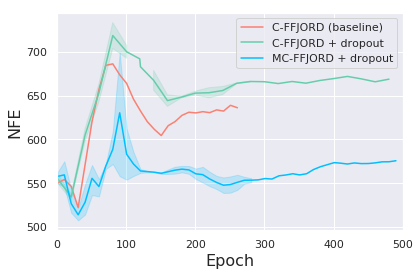

In [81]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=10, stop_point=stop_point_bs8k, color='Salmon')
sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=20, stop_point=stop_point_bs8k_drop, color='MediumAquamarine')
sns_plot = plot_line(file_names_mc_bs8k_drop, keys_mc_bs8k_drop, id_mc_bs8k_drop, stride=10, stop_point=stop_point_mc_bs8k_drop, color='DeepSkyBlue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NFE', fontsize = 16)
sns_plot.set_xlim(0,500)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [105]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'error_test_cond_cifar_bs900.pdf'


# bs900
file_names_bs900 = ['./figures/result_data_published/run-900_run1_error_validation-tag-error.json',
                   './figures/result_data_published/run-900_run2_error_validation-tag-error.json',
                   './figures/result_data_published/run-900_run3_error_validation-tag-error.json']
keys_bs900 = ['run1','run2','run3']
id_bs900 = 'C-FFJORD (baseline), bs=900'
stop_point_bs900 = 500

# bs900_drop
file_names_bs900_drop = ['./figures/result_data_published/run-900_drop_0_5_run1_error_validation-tag-error.json',
                        './figures/result_data_published/run-900_drop_0_5_run2_error_validation-tag-error.json',
                        './figures/result_data_published/run-900_drop_0_5_run3_error_validation-tag-error.json',]
keys_bs900_drop = ['run1','run2','run3']
id_bs900_drop = 'C-FFJORD + dropout, bs=900'
stop_point_bs900_drop = 500

# bs900_mc
file_names_mc_bs900 = ['./figures/result_data_published/run-900_st_0_5_run1_error_validation-tag-error.json',
                      './figures/result_data_published/run-900_st_0_5_run2_error_validation-tag-error.json',
                      './figures/result_data_published/run-900_st_0_5_run3_error_validation-tag-error.json',]
keys_mc_bs900 = ['run1','run2','run3']
id_mc_bs900 = 'MC-FFJORD, bs=900'
stop_point_mc_bs900 = 500

# bs900_mc_drop
file_names_mc_bs900_drop = ['./figures/result_data_published/run-900_st_0_5_drop_0_5_run1_error_validation-tag-error.json',
                           './figures/result_data_published/run-900_st_0_5_drop_0_5_run2_error_validation-tag-error.json',
                           './figures/result_data_published/run-900_st_0_5_drop_0_5_run3_error_validation-tag-error.json',]
keys_mc_bs900_drop = ['run1','run2','run3']
id_mc_bs900_drop = 'MC-FFJORD + dropout, bs=900'
stop_point_mc_bs900_drop = 500

###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'error_test_cond_cifar_bs8k.pdf'


# bs8k
file_names_bs8k = ['./figures/result_data_published/run-8K_run1_error_validation-tag-error.json',]
keys_bs8k = ['run1']
id_bs8k = 'C-FFJORD (baseline), bs=8k'
stop_point_bs8k = 500

# bs8k_drop
file_names_bs8k_drop = ['./figures/result_data_published/run-8K_drop_0_5_run1_error_validation-tag-error.json',]
keys_bs8k_drop = ['run1',]
id_bs8k_drop = 'C-FFJORD + dropout, bs=8k'
stop_point_bs8k_drop = 500

# bs8k_mc_drop
file_names_mc_bs8k_drop = ['./figures/result_data_published/run-8K_st_0_5_drop_0_5_run1_error_validation-tag-error.json',
                           ]
keys_mc_bs8k_drop = ['run1']
id_mc_bs8k_drop = 'MC-FFJORD + dropout, bs=8k'
stop_point_mc_bs8k_drop = 500

In [106]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'


# bs900
file_names_bs900_t = ['./figures/result_data_published/run-900_run1_epoch_time_validation-tag-epoch_time.json',
                   './figures/result_data_published/run-900_run2_epoch_time_validation-tag-epoch_time.json',
                   './figures/result_data_published/run-900_run3_epoch_time_validation-tag-epoch_time.json']
keys_bs900 = ['run1','run2','run3']
id_bs900 = 'C-FFJORD (baseline), bs=900'
stop_point_bs900 = 500

# bs900_drop
file_names_bs900_drop_t = ['./figures/result_data_published/run-900_drop_0_5_run1_epoch_time_validation-tag-epoch_time.json',
                        './figures/result_data_published/run-900_drop_0_5_run2_epoch_time_validation-tag-epoch_time.json',
                        './figures/result_data_published/run-900_drop_0_5_run3_epoch_time_validation-tag-epoch_time.json',]
keys_bs900_drop = ['run1','run2','run3']
id_bs900_drop = 'C-FFJORD + dropout, bs=900'
stop_point_bs900_drop = 500

# bs900_mc
file_names_mc_bs900_t = ['./figures/result_data_published/run-900_st_0_5_run1_epoch_time_validation-tag-epoch_time.json',
                      './figures/result_data_published/run-900_st_0_5_run2_epoch_time_validation-tag-epoch_time.json',
                      './figures/result_data_published/run-900_st_0_5_run3_epoch_time_validation-tag-epoch_time.json',]
keys_mc_bs900 = ['run1','run2','run3']
id_mc_bs900 = 'MC-FFJORD, bs=900'
stop_point_mc_bs900 = 500

# bs900_mc_drop
file_names_mc_bs900_drop_t = ['./figures/result_data_published/run-900_st_0_5_drop_0_5_run1_epoch_time_validation-tag-epoch_time.json',
                           './figures/result_data_published/run-900_st_0_5_drop_0_5_run2_epoch_time_validation-tag-epoch_time.json',
                           './figures/result_data_published/run-900_st_0_5_drop_0_5_run3_epoch_time_validation-tag-epoch_time.json',]
keys_mc_bs900_drop = ['run1','run2','run3']
id_mc_bs900_drop = 'MC-FFJORD + dropout, bs=900'
stop_point_mc_bs900_drop = 500

###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'error_test_cond_cifar_bs8k.pdf'


# bs8k
file_names_bs8k_t = ['./figures/result_data_published/run-8K_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs8k = ['run1']
id_bs8k = 'C-FFJORD (baseline), , bs=8k'
stop_point_bs8k = 500

# bs8k_drop
file_names_bs8k_drop_t = ['./figures/result_data_published/run-8K_drop_0_5_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs8k_drop = ['run1',]
id_bs8k_drop = 'C-FFJORD + dropout, bs=8k'
stop_point_bs8k_drop = 500

# bs8k_mc_drop
file_names_mc_bs8k_drop_t = ['./figures/result_data_published/run-8K_st_0_5_drop_0_5_run1_epoch_time_validation-tag-epoch_time.json',
                           ]
keys_mc_bs8k_drop = ['run1',]
id_mc_bs8k_drop = 'MC-FFJORD + dropout, , bs=8k'
stop_point_mc_bs8k_drop = 500

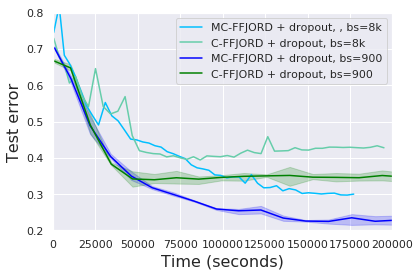

In [108]:
sns.set(style="darkgrid")
def make_dataframe_loss_vs_time(filenames_time, filenames_loss, keys, trial_id, color=None, stride = 1, stop_point=500):
    dat_t = 0
    stop_point_t = 500
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
    
        stop_point_t = min(stop_point_t, len(dat_tf))
        
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
        try:
            dat_t = dat_t + np.array(dat_tf[0:stop_point_t])
        except:
            print(fnt)
            Tracer()()
    
    dat_t /= len(filenames_time)
    dat_t = list(np.cumsum(dat_t[:,2]))
    stop_point_t = min(stop_point, len(dat_t))
    
    df = []
    stop_point_l = 500
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        stop_point_l = min(stop_point_l, stop_point_t, len(dat_l))
        
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        dat_l = dat_l[:stop_point_l:stride]
        df_l  = pd.DataFrame(dat_l, columns=['wall_time', 'step', 'value'])
        try:
            df_l['step_time'] = dat_t[:stop_point_l:stride]
        except:
            print(fnl)
            Tracer()()
        df.append(df_l)
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step_time", y="value", data=df, label=trial_id, color=color)
    
    return sns_plot

save_name = 'test_error_vs_time_cond_cifar_bs900_8k.pdf'

sns_plot = make_dataframe_loss_vs_time(file_names_mc_bs8k_drop_t, file_names_mc_bs8k_drop, keys_mc_bs8k_drop, id_mc_bs8k_drop, stride = 10, stop_point=stop_point_mc_bs8k_drop, color='DeepSkyBlue')
sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_drop_t, file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride = 10, stop_point=stop_point_bs8k_drop, color='MediumAquamarine')

sns_plot = make_dataframe_loss_vs_time(file_names_mc_bs900_drop_t, file_names_mc_bs900_drop, keys_mc_bs900_drop, id_mc_bs900_drop, stride = 10, stop_point=stop_point_mc_bs900_drop, color='blue')
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_drop_t, file_names_bs900_drop, keys_bs900_drop, id_bs900_drop, stride = 10, stop_point=stop_point_bs900_drop, color='green')

sns_plot.set_xlabel('Time (seconds)', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)
sns_plot.set_ylim(0.2,0.8)
sns_plot.set_xlim(0.0,200000)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [109]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'error_test_cond_cifar_bs900.pdf'


# bs900
file_names_bs900 = ['./figures/result_data_published/run-900_run1_bits_per_dim_validation-tag-bits_per_dim.json',
                   './figures/result_data_published/run-900_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                   './figures/result_data_published/run-900_run3_bits_per_dim_validation-tag-bits_per_dim.json']
keys_bs900 = ['run1','run2','run3']
id_bs900 = 'C-FFJORD (baseline), bs=900'
stop_point_bs900 = 500

# bs900_drop
file_names_bs900_drop = ['./figures/result_data_published/run-900_drop_0_5_run1_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures/result_data_published/run-900_drop_0_5_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures/result_data_published/run-900_drop_0_5_run3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs900_drop = ['run1','run2','run3']
id_bs900_drop = 'C-FFJORD + dropout, bs=900'
stop_point_bs900_drop = 500

# bs900_mc
file_names_mc_bs900 = ['./figures/result_data_published/run-900_st_0_5_run1_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures/result_data_published/run-900_st_0_5_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures/result_data_published/run-900_st_0_5_run3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_mc_bs900 = ['run1','run2','run3']
id_mc_bs900 = 'MC-FFJORD, bs=900'
stop_point_mc_bs900 = 500

# bs900_mc_drop
file_names_mc_bs900_drop = ['./figures/result_data_published/run-900_st_0_5_drop_0_5_run1_bits_per_dim_validation-tag-bits_per_dim.json',
                           './figures/result_data_published/run-900_st_0_5_drop_0_5_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                           './figures/result_data_published/run-900_st_0_5_drop_0_5_run3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_mc_bs900_drop = ['run1','run2','run3']
id_mc_bs900_drop = 'MC-FFJORD + dropout, bs=900'
stop_point_mc_bs900_drop = 500

###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'error_test_cond_cifar_bs8k.pdf'


# bs8k
file_names_bs8k = ['./figures/result_data_published/run-8K_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs8k = ['run1']
id_bs8k = 'C-FFJORD (baseline), bs=8k'
stop_point_bs8k = 500

# bs8k_drop
file_names_bs8k_drop = ['./figures/result_data_published/run-8K_drop_0_5_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs8k_drop = ['run1',]
id_bs8k_drop = 'C-FFJORD + dropout, bs=8k'
stop_point_bs8k_drop = 500

# bs8k_mc_drop
file_names_mc_bs8k_drop = ['./figures/result_data_published/run-8K_st_0_5_drop_0_5_run1_bits_per_dim_validation-tag-bits_per_dim.json',
                           ]
keys_mc_bs8k_drop = ['run1']
id_mc_bs8k_drop = 'MC-FFJORD + dropout, bs=8k'
stop_point_mc_bs8k_drop = 500

In [110]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'


# bs900
file_names_bs900_t = ['./figures/result_data_published/run-900_run1_epoch_time_validation-tag-epoch_time.json',
                   './figures/result_data_published/run-900_run2_epoch_time_validation-tag-epoch_time.json',
                   './figures/result_data_published/run-900_run3_epoch_time_validation-tag-epoch_time.json']
keys_bs900 = ['run1','run2','run3']
id_bs900 = 'C-FFJORD (baseline), bs=900'
stop_point_bs900 = 500

# bs900_drop
file_names_bs900_drop_t = ['./figures/result_data_published/run-900_drop_0_5_run1_epoch_time_validation-tag-epoch_time.json',
                        './figures/result_data_published/run-900_drop_0_5_run2_epoch_time_validation-tag-epoch_time.json',
                        './figures/result_data_published/run-900_drop_0_5_run3_epoch_time_validation-tag-epoch_time.json',]
keys_bs900_drop = ['run1','run2','run3']
id_bs900_drop = 'C-FFJORD + dropout, bs=900'
stop_point_bs900_drop = 500

# bs900_mc
file_names_mc_bs900_t = ['./figures/result_data_published/run-900_st_0_5_run1_epoch_time_validation-tag-epoch_time.json',
                      './figures/result_data_published/run-900_st_0_5_run2_epoch_time_validation-tag-epoch_time.json',
                      './figures/result_data_published/run-900_st_0_5_run3_epoch_time_validation-tag-epoch_time.json',]
keys_mc_bs900 = ['run1','run2','run3']
id_mc_bs900 = 'MC-FFJORD, bs=900'
stop_point_mc_bs900 = 500

# bs900_mc_drop
file_names_mc_bs900_drop_t = ['./figures/result_data_published/run-900_st_0_5_drop_0_5_run1_epoch_time_validation-tag-epoch_time.json',
                           './figures/result_data_published/run-900_st_0_5_drop_0_5_run2_epoch_time_validation-tag-epoch_time.json',
                           './figures/result_data_published/run-900_st_0_5_drop_0_5_run3_epoch_time_validation-tag-epoch_time.json',]
keys_mc_bs900_drop = ['run1','run2','run3']
id_mc_bs900_drop = 'MC-FFJORD + dropout, bs=900'
stop_point_mc_bs900_drop = 500

###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'error_test_cond_cifar_bs8k.pdf'


# bs8k
file_names_bs8k_t = ['./figures/result_data_published/run-8K_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs8k = ['run1']
id_bs8k = 'C-FFJORD (baseline), , bs=8k'
stop_point_bs8k = 500

# bs8k_drop
file_names_bs8k_drop_t = ['./figures/result_data_published/run-8K_drop_0_5_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs8k_drop = ['run1',]
id_bs8k_drop = 'C-FFJORD + dropout, bs=8k'
stop_point_bs8k_drop = 500

# bs8k_mc_drop
file_names_mc_bs8k_drop_t = ['./figures/result_data_published/run-8K_st_0_5_drop_0_5_run1_epoch_time_validation-tag-epoch_time.json',
                           ]
keys_mc_bs8k_drop = ['run1',]
id_mc_bs8k_drop = 'MC-FFJORD + dropout, , bs=8k'
stop_point_mc_bs8k_drop = 500

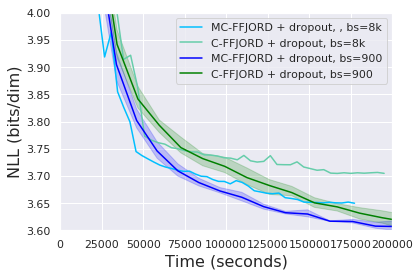

In [115]:
sns.set(style="darkgrid")
def make_dataframe_loss_vs_time(filenames_time, filenames_loss, keys, trial_id, color=None, stride = 1, stop_point=500):
    dat_t = 0
    stop_point_t = 500
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
    
        stop_point_t = min(stop_point_t, len(dat_tf))
        
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
        try:
            dat_t = dat_t + np.array(dat_tf[0:stop_point_t])
        except:
            print(fnt)
            Tracer()()
    
    dat_t /= len(filenames_time)
    dat_t = list(np.cumsum(dat_t[:,2]))
    stop_point_t = min(stop_point, len(dat_t))
    
    df = []
    stop_point_l = 500
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        stop_point_l = min(stop_point_l, stop_point_t, len(dat_l))
        
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        dat_l = dat_l[:stop_point_l:stride]
        df_l  = pd.DataFrame(dat_l, columns=['wall_time', 'step', 'value'])
        try:
            df_l['step_time'] = dat_t[:stop_point_l:stride]
        except:
            print(fnl)
            Tracer()()
        df.append(df_l)
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step_time", y="value", data=df, label=trial_id, color=color)
    
    return sns_plot

save_name = 'test_nll_vs_time_cond_cifar_bs900_8k.pdf'

sns_plot = make_dataframe_loss_vs_time(file_names_mc_bs8k_drop_t, file_names_mc_bs8k_drop, keys_mc_bs8k_drop, id_mc_bs8k_drop, stride = 10, stop_point=stop_point_mc_bs8k_drop, color='DeepSkyBlue')
sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_drop_t, file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride = 10, stop_point=stop_point_bs8k_drop, color='MediumAquamarine')

sns_plot = make_dataframe_loss_vs_time(file_names_mc_bs900_drop_t, file_names_mc_bs900_drop, keys_mc_bs900_drop, id_mc_bs900_drop, stride = 10, stop_point=stop_point_mc_bs900_drop, color='blue')
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_drop_t, file_names_bs900_drop, keys_bs900_drop, id_bs900_drop, stride = 10, stop_point=stop_point_bs900_drop, color='green')

sns_plot.set_xlabel('Time (seconds)', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_ylim(3.6,4.0)
sns_plot.set_xlim(0.0,200000)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Test error for conditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'error_test_cond_cifar_bs8k.pdf'

# # 8k
# file_names_bs8k = ['./figures/result_data/run-bs8k_cond_cifar10_run1_error_validation-tag-error.json',]
# keys_bs8k = ['run1']
# id_bs8k = 'C-FFJORD'
# stop_point_bs8k = 98


# 8k drop
file_names_bs8k_drop = ['./figures/result_data/run-bs8k_cond_cifar10_drop_run1_error_validation-tag-error.json',]
keys_bs8k_drop = ['run1']
id_bs8k_drop = 'C-FFJORD + dropout'
stop_point_bs8k_drop = 400

# 8k drop
file_names_bs8k_split_drop = ['./figures/result_data/run-bs8k_cond_cifar10_split_drop_run1_error_validation-tag-error.json',]
keys_bs8k_split_drop = ['run1']
id_bs8k_split_drop = 'MC-FFJORD + dropout'
stop_point_bs8k_split_drop = 500


In [ ]:
###############################################################
#### NFE for unconditional FFJORD on MNIST ####
###############################################################

save_dir = './figures'
save_name = 'nfe_uncond_mnist.pdf'
# bs8k_ec
file_names_bs8k_ec = ['./figures/result_data/run-bs8k_ec_run1_nfe_train_epoch-tag-nfe.json',
              './figures/result_data/run-bs8k_ec_run2_nfe_train_epoch-tag-nfe.json',
              './figures/result_data/run-bs8k_ec_run3_nfe_train_epoch-tag-nfe.json']
keys_bs8k_ec = ['run1', 'run2', 'run3']
id_bs8k_ec = 'bs 8K + error tol'

# bs8k
file_names_bs8k = ['./figures/result_data/run-bs8k_run1_nfe_train_epoch-tag-nfe.json',
              './figures/result_data/run-bs8k_run2_nfe_train_epoch-tag-nfe.json',
              './figures/result_data/run-bs8k_run3_nfe_train_epoch-tag-nfe.json']
keys_bs8k = ['run1', 'run2', 'run3']
id_bs8k = 'bs 8K'

# bs900
file_names_bs900 = ['./figures/result_data/run-bs900_run1_nfe_train_epoch-tag-nfe.json',
              './figures/result_data/run-bs900_run2_nfe_train_epoch-tag-nfe.json',
              './figures/result_data/run-bs900_run3_nfe_train_epoch-tag-nfe.json']
keys_bs900 = ['run1', 'run2', 'run3']
id_bs900 = 'bs 900 (baseline)'
stop_point_bs900 = 256 

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id)
    return sns_plot

sns_plot = plot_line(file_names_bs8k_ec, keys_bs8k_ec, id_bs8k_ec)
sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k)
sns_plot = plot_line(file_names_bs900, keys_bs900, id_bs900, stop_point=stop_point_bs900)
sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NFE', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Test NLL for unconditional FFJORD on MNIST ####
###############################################################

save_dir = './figures'
save_name = 'nll_test_uncond_mnist.pdf'
# bs8k_ec
file_names_bs8k_ec = ['./figures/result_data/run-bs8k_ec_run1_bits_per_dim_validation-tag-bits_per_dim.json',
              './figures/result_data/run-bs8k_ec_run2_bits_per_dim_validation-tag-bits_per_dim.json',
              './figures/result_data/run-bs8k_ec_run3_bits_per_dim_validation-tag-bits_per_dim.json']
keys_bs8k_ec = ['run1', 'run2', 'run3']
id_bs8k_ec = 'bs 8K + error tol'

# bs8k
file_names_bs8k = ['./figures/result_data/run-bs8k_run1_bits_per_dim_validation-tag-bits_per_dim.json',
              './figures/result_data/run-bs8k_run2_bits_per_dim_validation-tag-bits_per_dim.json',
              './figures/result_data/run-bs8k_run3_bits_per_dim_validation-tag-bits_per_dim.json']
keys_bs8k = ['run1', 'run2', 'run3']
id_bs8k = 'bs 8K'

# bs900
file_names_bs900 = ['./figures/result_data/run-bs900_run1_bits_per_dim_validation-tag-bits_per_dim.json',
              './figures/result_data/run-bs900_run2_bits_per_dim_validation-tag-bits_per_dim.json',
              './figures/result_data/run-bs900_run3_bits_per_dim_validation-tag-bits_per_dim.json']
keys_bs900 = ['run1', 'run2', 'run3']
id_bs900 = 'bs 900 (baseline)'
stop_point_bs900 = 256

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id)
    return sns_plot

sns_plot = plot_line(file_names_bs8k_ec, keys_bs8k_ec, id_bs8k_ec, stride=10)
sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=10)
sns_plot = plot_line(file_names_bs900, keys_bs900, id_bs900, stride=10, stop_point=stop_point_bs900)
sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_ylim(0.9,1.5)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Test NLL for unconditional FFJORD on MNIST ####
###############################################################

save_dir = './figures'
save_name = 'epoch_time_uncond_mnist.pdf'
# bs8k_ec
file_names_bs8k_ec_t = ['./figures/result_data/run-bs8k_ec_run1_epoch_time_validation-tag-epoch_time.json',
              './figures/result_data/run-bs8k_ec_run2_epoch_time_validation-tag-epoch_time.json',
              './figures/result_data/run-bs8k_ec_run3_epoch_time_validation-tag-epoch_time.json']
keys_bs8k_ec = ['run1', 'run2', 'run3']
id_bs8k_ec = 'bs 8K + error tol'

# bs8k
file_names_bs8k_t = ['./figures/result_data/run-bs8k_run1_epoch_time_validation-tag-epoch_time.json',
              './figures/result_data/run-bs8k_run2_epoch_time_validation-tag-epoch_time.json',
              './figures/result_data/run-bs8k_run3_epoch_time_validation-tag-epoch_time.json']
keys_bs8k = ['run1', 'run2', 'run3']
id_bs8k = 'bs 8K'

# bs900
file_names_bs900_t = ['./figures/result_data/run-bs900_run1_epoch_time_validation-tag-epoch_time.json',
              './figures/result_data/run-bs900_run1_epoch_time_validation-tag-epoch_time.json',
              './figures/result_data/run-bs900_run1_epoch_time_validation-tag-epoch_time.json']
keys_bs900 = ['run1', 'run2', 'run3']
id_bs900 = 'bs 900 (baseline)'
stop_point_bs900 = 256

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id)
    return sns_plot

sns_plot = plot_line(file_names_bs8k_ec_t, keys_bs8k_ec, id_bs8k_ec, stride=10)
sns_plot = plot_line(file_names_bs8k_t, keys_bs8k, id_bs8k, stride=10)
sns_plot = plot_line(file_names_bs900_t, keys_bs900, id_bs900, stride=10, stop_point=stop_point_bs900)
sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Epoch time (second)', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
sns.set(style="darkgrid")
def make_dataframe_loss_vs_time(filenames_time, filenames_loss, keys, trial_id, stride = 1, stop_point=500):
    dat_t = 0
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_t = dat_t + np.array(json.load(jft)[0:500])
    
    dat_t /= len(filenames_time)
    dat_t = list(np.cumsum(dat_t[:,2]))
    stop_point_t = min(stop_point, len(dat_t))
    dat_t = dat_t[:stop_point_t:stride]
    
    df = []
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        stop_point_l = min(stop_point, len(dat_l))
        dat_l = dat_l[:stop_point_l:stride]
        df_l  = pd.DataFrame(dat_l, columns=['wall_time', 'step', 'value'])
        df_l['step_time'] = dat_t
        df.append(df_l)
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step_time", y="value", data=df, label=trial_id)
    
    return sns_plot

save_name = 'nll_test_vs_time_uncond_mnist.pdf'

sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_ec_t, file_names_bs8k_ec, keys_bs8k_ec, id_bs8k_ec, stride = 10, stop_point=500)
sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_t, file_names_bs8k, keys_bs8k, id_bs8k, stride = 10, stop_point=500)
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_t, file_names_bs900, keys_bs900, id_bs900, stride = 10, stop_point=256)
sns_plot.set_ylim(0.9,1.5)
sns_plot.set_xlabel('Time', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Train NLL for unconditional FFJORD on MNIST ####
###############################################################

save_dir = './figures'
save_name = 'nll_train_uncond_mnist.pdf'
# bs8k_ec
file_names_bs8k_ec = ['./figures/result_data/run-bs8k_ec_run1_bits_per_dim_train_epoch-tag-bits_per_dim.json',
              './figures/result_data/run-bs8k_ec_run2_bits_per_dim_train_epoch-tag-bits_per_dim.json',
              './figures/result_data/run-bs8k_ec_run3_bits_per_dim_train_epoch-tag-bits_per_dim.json']
keys_bs8k_ec = ['run1', 'run2', 'run3']
id_bs8k_ec = 'bs 8K + error tol'

# bs8k
file_names_bs8k = ['./figures/result_data/run-bs8k_run1_bits_per_dim_train_epoch-tag-bits_per_dim.json',
              './figures/result_data/run-bs8k_run2_bits_per_dim_train_epoch-tag-bits_per_dim.json',
              './figures/result_data/run-bs8k_run3_bits_per_dim_train_epoch-tag-bits_per_dim.json']
keys_bs8k = ['run1', 'run2', 'run3']
id_bs8k = 'bs 8K'

# bs900
file_names_bs900 = ['./figures/result_data/run-bs900_run1_bits_per_dim_train_epoch-tag-bits_per_dim.json',
              './figures/result_data/run-bs900_run2_bits_per_dim_train_epoch-tag-bits_per_dim.json',
              './figures/result_data/run-bs900_run3_bits_per_dim_train_epoch-tag-bits_per_dim.json']
keys_bs900 = ['run1', 'run2', 'run3']
id_bs900 = 'bs 900 (baseline)'
stop_point_bs900 = 256

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id)
    return sns_plot

sns_plot = plot_line(file_names_bs8k_ec, keys_bs8k_ec, id_bs8k_ec, stride=10)
sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=10)
sns_plot = plot_line(file_names_bs900, keys_bs900, id_bs900, stride=10, stop_point=stop_point_bs900)
sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_ylim(0.9,1.5)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
sns.set(style="darkgrid")
def make_dataframe_loss_vs_time(filenames_time, filenames_loss, keys, trial_id, stride = 1, stop_point=500):
    dat_t = 0
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_t = dat_t + np.array(json.load(jft)[0:500])
    
    dat_t /= len(filenames_time)
    dat_t = list(np.cumsum(dat_t[:,2]))
    stop_point_t = min(stop_point, len(dat_t))
    dat_t = dat_t[:stop_point_t:stride]
    
    df = []
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        stop_point_l = min(stop_point, len(dat_l))
        dat_l = dat_l[:stop_point_l:stride]
        df_l  = pd.DataFrame(dat_l, columns=['wall_time', 'step', 'value'])
        df_l['step_time'] = dat_t
        df.append(df_l)
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step_time", y="value", data=df, label=trial_id)
    
    return sns_plot

save_name = 'nll_train_vs_time_uncond_mnist.pdf'

sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_ec_t, file_names_bs8k_ec, keys_bs8k_ec, id_bs8k_ec, stride = 10, stop_point=500)
sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_t, file_names_bs8k, keys_bs8k, id_bs8k, stride = 10, stop_point=500)
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_t, file_names_bs900, keys_bs900, id_bs900, stride = 10, stop_point=256)
sns_plot.set_ylim(0.9,1.5)
sns_plot.set_xlabel('Time', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### NFE for conditional FFJORD on MNIST ####
###############################################################

save_dir = './figures'
save_name = 'nfe_cond_mnist.pdf'

# bs8k + dis + drop
file_names_bs8k_dis_drop = ['./figures/result_data/run-bs8k_cond_dis_drop_run2_nfe_train_epoch-tag-nfe.json',
              './figures/result_data/run-bs8k_cond_dis_drop_run3_nfe_train_epoch-tag-nfe.json',]
keys_bs8k_dis_drop = ['run2', 'run3']
id_bs8k_dis_drop = 'bs 8K + split + drop'

# bs8k + drop
file_names_bs8k_drop = ['./figures/result_data/run-bs8k_cond_drop_run1_nfe_train_epoch-tag-nfe.json',
              './figures/result_data/run-bs8k_cond_drop_run3_nfe_train_epoch-tag-nfe.json',]
keys_bs8k_drop = ['run1', 'run3']
id_bs8k_drop = 'bs 8K + drop'

# bs8k
file_names_bs8k = ['./figures/result_data/run-bs8k_cond_run1_nfe_train_epoch-tag-nfe.json',]
keys_bs8k = ['run1',]
id_bs8k = 'bs 8K'

# bs900
file_names_bs900 = ['./figures/result_data/run-bs900_cond_run1_nfe_train_epoch-tag-nfe.json',]
keys_bs900 = ['run1',]
id_bs900 = 'bs 900'
stop_point_bs900 = 256 

# bs900 dis
file_names_bs900_dis = ['./figures/result_data/run-bs900_cond_dis_run1_nfe_train_epoch-tag-nfe.json',]
keys_bs900_dis = ['run1',]
id_bs900_dis = 'bs 900 + split'
stop_point_bs900_dis = 256 

# bs900 dis drop
file_names_bs900_dis_drop = ['./figures/result_data/run-bs900_cond_dis_drop_run1_nfe_train_epoch-tag-nfe.json',]
keys_bs900_dis_drop = ['run1',]
id_bs900_dis_drop = 'bs 900 + split + drop'
stop_point_bs900_dis_drop = 256 

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id)
    return sns_plot

sns_plot = plot_line(file_names_bs8k_dis_drop, keys_bs8k_dis_drop, id_bs8k_dis_drop)
sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop)
sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k)
sns_plot = plot_line(file_names_bs900, keys_bs900, id_bs900, stop_point=stop_point_bs900)
sns_plot = plot_line(file_names_bs900_dis, keys_bs900_dis, id_bs900_dis, stop_point=stop_point_bs900_dis)
sns_plot = plot_line(file_names_bs900_dis_drop, keys_bs900_dis_drop, id_bs900_dis_drop, stop_point=stop_point_bs900_dis_drop)
sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NFE', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Error for conditional FFJORD on MNIST ####
###############################################################

save_dir = './figures'
save_name = 'error_test_cond_mnist.pdf'

# bs8k + dis + drop
file_names_bs8k_dis_drop = ['./figures/result_data/run-bs8k_cond_dis_drop_run2_error_validation-tag-error.json',
              './figures/result_data/run-bs8k_cond_dis_drop_run3_error_validation-tag-error.json',]
keys_bs8k_dis_drop = ['run2', 'run3']
id_bs8k_dis_drop = 'bs 8K + split + drop'

# bs8k + drop
file_names_bs8k_drop = ['./figures/result_data/run-bs8k_cond_drop_run1_error_validation-tag-error.json',
              './figures/result_data/run-bs8k_cond_drop_run3_error_validation-tag-error.json',]
keys_bs8k_drop = ['run1', 'run3']
id_bs8k_drop = 'bs 8K + drop'

# bs8k
file_names_bs8k = ['./figures/result_data/run-bs8k_cond_run1_error_validation-tag-error.json',]
keys_bs8k = ['run1',]
id_bs8k = 'bs 8K'
stop_point_bs8k = 75

# bs900
file_names_bs900 = ['./figures/result_data/run-bs900_cond_run1_error_validation-tag-error.json',]
keys_bs900 = ['run1',]
id_bs900 = 'bs 900'
stop_point_bs900 = 256 

# bs900 dis
file_names_bs900_dis = ['./figures/result_data/run-bs900_cond_dis_run1_error_validation-tag-error.json',]
keys_bs900_dis = ['run1',]
id_bs900_dis = 'bs 900 + split'
stop_point_bs900_dis = 256 

# bs900 dis drop
file_names_bs900_dis_drop = ['./figures/result_data/run-bs900_cond_dis_drop_run1_error_validation-tag-error.json',]
keys_bs900_dis_drop = ['run1',]
id_bs900_dis_drop = 'bs 900 + split + drop'
stop_point_bs900_dis_drop = 256 

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id)
    return sns_plot

sns_plot = plot_line(file_names_bs8k_dis_drop, keys_bs8k_dis_drop, id_bs8k_dis_drop, stride = 10)
sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride = 10)
#sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stop_point=stop_point_bs8k)
sns_plot = plot_line(file_names_bs900, keys_bs900, id_bs900, stop_point=stop_point_bs900, stride = 10)
sns_plot = plot_line(file_names_bs900_dis, keys_bs900_dis, id_bs900_dis, stop_point=stop_point_bs900_dis, stride = 10)
sns_plot = plot_line(file_names_bs900_dis_drop, keys_bs900_dis_drop, id_bs900_dis_drop, stop_point=stop_point_bs900_dis_drop, stride = 10)
sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)
sns_plot.set_ylim(0.005,0.03)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### NLL for conditional FFJORD on MNIST ####
###############################################################

save_dir = './figures'
save_name = 'nll_test_cond_mnist.pdf'

# bs8k + dis + drop
file_names_bs8k_dis_drop = ['./figures/result_data/run-bs8k_cond_dis_drop_run2_bits_per_dim_validation-tag-bits_per_dim.json',
              './figures/result_data/run-bs8k_cond_dis_drop_run3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs8k_dis_drop = ['run2', 'run3']
id_bs8k_dis_drop = 'bs 8K + split + drop'

# bs8k + drop
file_names_bs8k_drop = ['./figures/result_data/run-bs8k_cond_drop_run1_bits_per_dim_validation-tag-bits_per_dim.json',
              './figures/result_data/run-bs8k_cond_drop_run3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs8k_drop = ['run1', 'run3']
id_bs8k_drop = 'bs 8K + drop'

# bs8k
file_names_bs8k = ['./figures/result_data/run-bs8k_cond_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs8k = ['run1',]
id_bs8k = 'bs 8K'
stop_point_bs8k = 75

# bs900
file_names_bs900 = ['./figures/result_data/run-bs900_cond_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs900 = ['run1',]
id_bs900 = 'bs 900'
stop_point_bs900 = 256 

# bs900 dis
file_names_bs900_dis = ['./figures/result_data/run-bs900_cond_dis_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs900_dis = ['run1',]
id_bs900_dis = 'bs 900 + split'
stop_point_bs900_dis = 256 

# bs900 dis drop
file_names_bs900_dis_drop = ['./figures/result_data/run-bs900_cond_dis_drop_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs900_dis_drop = ['run1',]
id_bs900_dis_drop = 'bs 900 + split + drop'
stop_point_bs900_dis_drop = 256 

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id)
    return sns_plot

sns_plot = plot_line(file_names_bs8k_dis_drop, keys_bs8k_dis_drop, id_bs8k_dis_drop, stride = 10)
sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride = 10)
#sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stop_point=stop_point_bs8k)
sns_plot = plot_line(file_names_bs900, keys_bs900, id_bs900, stop_point=stop_point_bs900, stride = 10)
sns_plot = plot_line(file_names_bs900_dis, keys_bs900_dis, id_bs900_dis, stop_point=stop_point_bs900_dis, stride = 10)
sns_plot = plot_line(file_names_bs900_dis_drop, keys_bs900_dis_drop, id_bs900_dis_drop, stop_point=stop_point_bs900_dis_drop, stride = 10)
sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_ylim(0.9,1.5)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for conditional FFJORD on MNIST ####
###############################################################

save_dir = './figures'
save_name = 'epoch_time_cond_mnist.pdf'

# bs8k + dis + drop
file_names_bs8k_dis_drop_t = ['./figures/result_data/run-bs8k_cond_dis_drop_run2_epoch_time_validation-tag-epoch_time.json',
              './figures/result_data/run-bs8k_cond_dis_drop_run3_epoch_time_validation-tag-epoch_time.json',]
keys_bs8k_dis_drop = ['run2', 'run3']
id_bs8k_dis_drop = 'bs 8K + split + drop'

# bs8k + drop
file_names_bs8k_drop_t = ['./figures/result_data/run-bs8k_cond_drop_run1_epoch_time_validation-tag-epoch_time.json',
              './figures/result_data/run-bs8k_cond_drop_run3_epoch_time_validation-tag-epoch_time.json',]
keys_bs8k_drop = ['run1', 'run3']
id_bs8k_drop = 'bs 8K + drop'

# bs8k
file_names_bs8k_t = ['./figures/result_data/run-bs8k_cond_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs8k = ['run1',]
id_bs8k = 'bs 8K'
stop_point_bs8k = 75

# bs900
file_names_bs900_t = ['./figures/result_data/run-bs900_cond_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs900 = ['run1',]
id_bs900 = 'bs 900'
stop_point_bs900 = 256 

# bs900 dis
file_names_bs900_dis_t = ['./figures/result_data/run-bs900_cond_dis_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs900_dis = ['run1',]
id_bs900_dis = 'bs 900 + split'
stop_point_bs900_dis = 256 

# bs900 dis drop
file_names_bs900_dis_drop_t = ['./figures/result_data/run-bs900_cond_dis_drop_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs900_dis_drop = ['run1',]
id_bs900_dis_drop = 'bs 900 + split + drop'
stop_point_bs900_dis_drop = 256 

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id)
    return sns_plot

sns_plot = plot_line(file_names_bs8k_dis_drop_t, keys_bs8k_dis_drop, id_bs8k_dis_drop, stride = 1)
sns_plot = plot_line(file_names_bs8k_drop_t, keys_bs8k_drop, id_bs8k_drop, stride = 1)
sns_plot = plot_line(file_names_bs8k_t, keys_bs8k, id_bs8k, stop_point=stop_point_bs8k, stride = 1)
sns_plot = plot_line(file_names_bs900_t, keys_bs900, id_bs900, stop_point=stop_point_bs900, stride = 1)
sns_plot = plot_line(file_names_bs900_dis_t, keys_bs900_dis, id_bs900_dis, stop_point=stop_point_bs900_dis, stride = 1)
sns_plot = plot_line(file_names_bs900_dis_drop_t, keys_bs900_dis_drop, id_bs900_dis_drop, stop_point=stop_point_bs900_dis_drop, stride = 1)
sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Epoch time (second)', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
sns.set(style="darkgrid")
def make_dataframe_loss_vs_time(filenames_time, filenames_loss, keys, trial_id, stride = 1, stop_point=500):
    dat_t = 0
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_t = dat_t + np.array(json.load(jft)[0:500])
    
    dat_t /= len(filenames_time)
    dat_t = list(np.cumsum(dat_t[:,2]))
    stop_point_t = min(stop_point, len(dat_t))
    dat_t = dat_t[:stop_point_t:stride]
    
    df = []
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        stop_point_l = min(stop_point, len(dat_l))
        dat_l = dat_l[:stop_point_l:stride]
        df_l  = pd.DataFrame(dat_l, columns=['wall_time', 'step', 'value'])
        df_l['step_time'] = dat_t
        df.append(df_l)
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step_time", y="value", data=df, label=trial_id)
    
    return sns_plot

save_name = 'error_test_vs_time_cond_mnist.pdf'

sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_dis_drop_t, file_names_bs8k_dis_drop, keys_bs8k_dis_drop, id_bs8k_dis_drop, stride = 10, stop_point=500)
sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_drop_t, file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride = 10, stop_point=500)
sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_t, file_names_bs8k, keys_bs8k, id_bs8k, stride = 10, stop_point=500)
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_t, file_names_bs900, keys_bs900, id_bs900, stride = 10, stop_point=256)
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_dis_drop_t, file_names_bs900_dis_drop, keys_bs900_dis_drop, id_bs900_dis_drop, stride = 10, stop_point=256)
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_dis_t, file_names_bs900_dis, keys_bs900_dis, id_bs900_dis, stride = 10, stop_point=256)
sns_plot.set_ylim(0.005,0.03)
sns_plot.set_xlabel('Time', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
sns.set(style="darkgrid")
def make_dataframe_loss_vs_time(filenames_time, filenames_loss, keys, trial_id, stride = 1, stop_point=500):
    dat_t = 0
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_t = dat_t + np.array(json.load(jft)[0:500])
    
    dat_t /= len(filenames_time)
    dat_t = list(np.cumsum(dat_t[:,2]))
    stop_point_t = min(stop_point, len(dat_t))
    dat_t = dat_t[:stop_point_t:stride]
    
    df = []
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        stop_point_l = min(stop_point, len(dat_l))
        dat_l = dat_l[:stop_point_l:stride]
        df_l  = pd.DataFrame(dat_l, columns=['wall_time', 'step', 'value'])
        df_l['step_time'] = dat_t
        df.append(df_l)
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step_time", y="value", data=df, label=trial_id)
    
    return sns_plot

save_name = 'nll_test_vs_time_cond_mnist.pdf'

sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_dis_drop_t, file_names_bs8k_dis_drop, keys_bs8k_dis_drop, id_bs8k_dis_drop, stride = 10, stop_point=500)
sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_drop_t, file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride = 10, stop_point=500)
sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_t, file_names_bs8k, keys_bs8k, id_bs8k, stride = 10, stop_point=500)
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_t, file_names_bs900, keys_bs900, id_bs900, stride = 10, stop_point=256)
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_dis_drop_t, file_names_bs900_dis_drop, keys_bs900_dis_drop, id_bs900_dis_drop, stride = 10, stop_point=256)
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_dis_t, file_names_bs900_dis, keys_bs900_dis, id_bs900_dis, stride = 10, stop_point=256)
sns_plot.set_ylim(0.9,1.5)
sns_plot.set_xlabel('Time', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### NFE for unconditional FFJORD on MNIST ####
###############################################################

save_dir = './figures'
save_name = 'nfe_uncond_cifar.pdf'
# bs8k_ec
file_names_bs8k_ec = ['./figures/result_data/run-bs8k_ec_cifar10_run1_nfe_train_epoch-tag-nfe.json',
                      './figures/result_data/run-bs8k_ec_cifar10_run2_nfe_train_epoch-tag-nfe.json',
                      './figures/result_data/run-bs8k_ec_cifar10_run3_nfe_train_epoch-tag-nfe.json',]
keys_bs8k_ec = ['run1','run2','run3']
id_bs8k_ec = 'bs 8K + error tol'


# bs900
file_names_bs900 = ['./figures/result_data/run-bs900_cifar10_run2_nfe_train_epoch-tag-nfe.json',
                    './figures/result_data/run-bs900_cifar10_run3_nfe_train_epoch-tag-nfe.json']
keys_bs900 = ['run2','run3']
id_bs900 = 'bs 900 (baseline)'
stop_point_bs900 = 136

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id)
    return sns_plot

sns_plot = plot_line(file_names_bs8k_ec, keys_bs8k_ec, id_bs8k_ec)
sns_plot = plot_line(file_names_bs900, keys_bs900, id_bs900, stop_point=stop_point_bs900)
sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NFE', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### NLL test for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'nll_test_uncond_cifar.pdf'
file_names_bs8k_ec = ['./figures/result_data/run-bs8k_ec_cifar10_run1_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures/result_data/run-bs8k_ec_cifar10_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures/result_data/run-bs8k_ec_cifar10_run3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs8k_ec = ['run1','run2','run3']
id_bs8k_ec = 'bs 8K + error tol'
stop_point_bs8k_ec = 500


# bs900
file_names_bs900 = ['./figures/result_data/run-bs900_cifar10_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                    './figures/result_data/run-bs900_cifar10_run3_bits_per_dim_validation-tag-bits_per_dim.json']
keys_bs900 = ['run2','run3']
id_bs900 = 'bs 900 (baseline)'
stop_point_bs900 = 136

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id)
    return sns_plot

sns_plot = plot_line(file_names_bs8k_ec, keys_bs8k_ec, id_bs8k_ec, stride=10)
sns_plot = plot_line(file_names_bs900, keys_bs900, id_bs900, stride=10, stop_point=stop_point_bs900)
sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_ylim(3.0,5.0)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on MNIST ####
###############################################################

save_dir = './figures'
save_name = 'epoch_time_uncond_cifar.pdf'
file_names_bs8k_ec_t = ['./figures/result_data/run-bs8k_ec_cifar10_run1_epoch_time_validation-tag-epoch_time.json',
                        './figures/result_data/run-bs8k_ec_cifar10_run2_epoch_time_validation-tag-epoch_time.json',
                        './figures/result_data/run-bs8k_ec_cifar10_run3_epoch_time_validation-tag-epoch_time.json',]
keys_bs8k_ec = ['run1','run2','run3']
id_bs8k_ec = 'bs 8K + error tol'


# bs900
file_names_bs900_t = ['./figures/result_data/run-bs900_cifar10_run2_epoch_time_validation-tag-epoch_time.json',
                      './figures/result_data/run-bs900_cifar10_run3_epoch_time_validation-tag-epoch_time.json']
keys_bs900 = ['run2','run3']
id_bs900 = 'bs 900 (baseline)'
stop_point_bs900 = 136

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id)
    return sns_plot

sns_plot = plot_line(file_names_bs8k_ec_t, keys_bs8k_ec, id_bs8k_ec, stride=1)
sns_plot = plot_line(file_names_bs900_t, keys_bs900, id_bs900, stride=1, stop_point=stop_point_bs900)
sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Epoch time (seconds)', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
sns.set(style="darkgrid")
def make_dataframe_loss_vs_time(filenames_time, filenames_loss, keys, trial_id, stride = 1, stop_point=500):
    dat_t = 0
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
    
        stop_point_t = min(stop_point, len(dat_tf))
        try:
            
            dat_t = dat_t + np.array(dat_tf[0:stop_point_t])
        except:
            Tracer()()
    
    dat_t /= len(filenames_time)
    dat_t = list(np.cumsum(dat_t[:,2]))
    stop_point_t = min(stop_point, len(dat_t))
    dat_t = dat_t[:stop_point_t:stride]
    
    df = []
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        stop_point_l = min(stop_point, len(dat_l))
        dat_l = dat_l[:stop_point_l:stride]
        df_l  = pd.DataFrame(dat_l, columns=['wall_time', 'step', 'value'])
        df_l['step_time'] = dat_t
        df.append(df_l)
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step_time", y="value", data=df, label=trial_id)
    
    return sns_plot

save_name = 'nll_test_vs_time_uncond_cifar.pdf'
stop_point_bs8k_ec = 158

sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_ec_t, file_names_bs8k_ec, keys_bs8k_ec, id_bs8k_ec, stride = 10, stop_point=stop_point_bs8k_ec)
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_t, file_names_bs900, keys_bs900, id_bs900, stride = 10, stop_point=stop_point_bs900)
sns_plot.set_ylim(3.0,5.0)
sns_plot.set_xlabel('Time (second)', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### NLL train for unconditional FFJORD on MNIST ####
###############################################################

save_dir = './figures'
save_name = 'nll_train_uncond_cifar.pdf'
file_names_bs8k_ec = ['./figures/result_data/run-bs8k_ec_cifar10_run1_bits_per_dim_train_epoch-tag-bits_per_dim.json',
                     './figures/result_data/run-bs8k_ec_cifar10_run2_bits_per_dim_train_epoch-tag-bits_per_dim.json',
                     './figures/result_data/run-bs8k_ec_cifar10_run3_bits_per_dim_train_epoch-tag-bits_per_dim.json']
keys_bs8k_ec = ['run1','run2','run3']
id_bs8k_ec = 'bs 8K + error tol'


# bs900
file_names_bs900 = ['./figures/result_data/run-bs900_cifar10_run2_bits_per_dim_train_epoch-tag-bits_per_dim.json',
                   './figures/result_data/run-bs900_cifar10_run3_bits_per_dim_train_epoch-tag-bits_per_dim.json']
keys_bs900 = ['run2','run3']
id_bs900 = 'bs 900 (baseline)'
stop_point_bs900 = 136

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id)
    return sns_plot

sns_plot = plot_line(file_names_bs8k_ec, keys_bs8k_ec, id_bs8k_ec, stride=10)
sns_plot = plot_line(file_names_bs900, keys_bs900, id_bs900, stride=10, stop_point=stop_point_bs900)
sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_ylim(3.0,5.0)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
sns.set(style="darkgrid")
def make_dataframe_loss_vs_time(filenames_time, filenames_loss, keys, trial_id, stride = 1, stop_point=500):
    dat_t = 0
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
    
        stop_point_t = min(stop_point, len(dat_tf))
        dat_t = dat_t + np.array(dat_tf[0:stop_point_t])
    
    dat_t /= len(filenames_time)
    dat_t = list(np.cumsum(dat_t[:,2]))
    stop_point_t = min(stop_point, len(dat_t))
    dat_t = dat_t[:stop_point_t:stride]
    
    df = []
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        stop_point_l = min(stop_point, len(dat_l))
        dat_l = dat_l[:stop_point_l:stride]
        df_l  = pd.DataFrame(dat_l, columns=['wall_time', 'step', 'value'])
        df_l['step_time'] = dat_t
        df.append(df_l)
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step_time", y="value", data=df, label=trial_id)
    
    return sns_plot

save_name = 'nll_train_vs_time_uncond_cifar.pdf'
stop_point_bs8k_ec = 158

sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_ec_t, file_names_bs8k_ec, keys_bs8k_ec, id_bs8k_ec, stride = 10, stop_point=stop_point_bs8k_ec)
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_t, file_names_bs900, keys_bs900, id_bs900, stride = 10, stop_point=stop_point_bs900)
sns_plot.set_ylim(3.0,5.0)
sns_plot.set_xlabel('Time (second)', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [75]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'epoch_time_cond_cifar.pdf'

# 8k drop
file_names_bs8k_split_drop_t = ['./figures/result_data/run-bs8k_cond_cifar10_split_drop_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs8k_split_drop = ['run1']
id_bs8k_split_drop = 'bs 8K drop split'

# 8k
file_names_bs8k_t = ['./figures/result_data/run-bs8k_cond_cifar10_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs8k = ['run1']
id_bs8k = 'bs 8K'

# 8k drop
file_names_bs8k_drop_t = ['./figures/result_data/run-bs8k_cond_cifar10_drop_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs8k_drop = ['run1']
id_bs8k_drop = 'bs 8K drop'

# bs900
file_names_bs900_t = ['./figures/result_data/run-bs900_cond_cifar10_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs900 = ['run1',]
id_bs900 = 'bs 900 (baseline)'
stop_point_bs900 = 500

# bs900_drop
file_names_bs900_drop_t = ['./figures/result_data/run-bs900_cond_cifar10_drop_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs900_drop = ['run1',]
id_bs900_drop = 'bs 900 drop'
stop_point_bs900_drop = 500

# bs900_split
file_names_bs900_split_t = ['./figures/result_data/run-bs900_cond_cifar10_split_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs900_split = ['run1',]
id_bs900_split = 'bs 900 split'
stop_point_bs900_split = 500

# bs900_split_drop
file_names_bs900_split_drop_t = ['./figures/result_data/run-bs900_cond_cifar10_split_drop_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs900_split_drop = ['run1',]
id_bs900_split_drop = 'bs 900 split drop'
stop_point_bs900_split_drop = 500



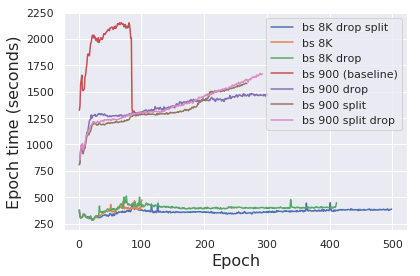

In [76]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id)
    return sns_plot

sns_plot = plot_line(file_names_bs8k_split_drop_t, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
sns_plot = plot_line(file_names_bs8k_t, keys_bs8k, id_bs8k, stride=1)
sns_plot = plot_line(file_names_bs8k_drop_t, keys_bs8k_drop, id_bs8k_drop, stride=1)

sns_plot = plot_line(file_names_bs900_t, keys_bs900, id_bs900, stride=1, stop_point=stop_point_bs900)
sns_plot = plot_line(file_names_bs900_drop_t, keys_bs900_drop, id_bs900_drop, stride=1, stop_point=stop_point_bs900_drop)
sns_plot = plot_line(file_names_bs900_split_t, keys_bs900_split, id_bs900_split, stride=1, stop_point=stop_point_bs900_split)
sns_plot = plot_line(file_names_bs900_split_drop_t , keys_bs900_split_drop, id_bs900_split_drop, stride=1, stop_point=stop_point_bs900_split_drop)

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Epoch time (seconds)', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [77]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'error_test_cond_cifar.pdf'

# 8k drop
file_names_bs8k_split_drop = ['./figures/result_data/run-bs8k_cond_cifar10_split_drop_run1_error_validation-tag-error.json',]
keys_bs8k_split_drop = ['run1']
id_bs8k_split_drop = 'bs 8K drop split'
stop_point_bs8k_split_drop = 500

# 8k
file_names_bs8k = ['./figures/result_data/run-bs8k_cond_cifar10_run1_error_validation-tag-error.json',]
keys_bs8k = ['run1']
id_bs8k = 'bs 8K'
stop_point_bs8k = 500

# 8k drop
file_names_bs8k_drop = ['./figures/result_data/run-bs8k_cond_cifar10_drop_run1_error_validation-tag-error.json',]
keys_bs8k_drop = ['run1']
id_bs8k_drop = 'bs 8K drop'
stop_point_bs8k_drop = 500

# bs900
file_names_bs900 = ['./figures/result_data/run-bs900_cond_cifar10_run1_error_validation-tag-error.json',]
keys_bs900 = ['run1',]
id_bs900 = 'bs 900 (baseline)'
stop_point_bs900 = 500

# bs900_drop
file_names_bs900_drop = ['./figures/result_data/run-bs900_cond_cifar10_drop_run1_error_validation-tag-error.json',]
keys_bs900_drop = ['run1',]
id_bs900_drop = 'bs 900 drop'
stop_point_bs900_drop = 500

# bs900_split
file_names_bs900_split = ['./figures/result_data/run-bs900_cond_cifar10_split_run1_error_validation-tag-error.json',]
keys_bs900_split = ['run1',]
id_bs900_split = 'bs 900 split'
stop_point_bs900_split = 500

# bs900_split_drop
file_names_bs900_split_drop = ['./figures/result_data/run-bs900_cond_cifar10_split_drop_run1_error_validation-tag-error.json',]
keys_bs900_split_drop = ['run1',]
id_bs900_split_drop = 'bs 900 split drop'
stop_point_bs900_split_drop = 500



In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

sns_plot = plot_line(file_names_bs900, keys_bs900, id_bs900, stride=10, stop_point=stop_point_bs900, color='red')
sns_plot = plot_line(file_names_bs900_drop, keys_bs900_drop, id_bs900_drop, stride=10, stop_point=stop_point_bs900_drop, color='orange')
sns_plot = plot_line(file_names_bs900_split, keys_bs900_split, id_bs900_split, stride=10, stop_point=stop_point_bs900_split, color='green')
sns_plot = plot_line(file_names_bs900_split_drop, keys_bs900_split_drop, id_bs900_split_drop, stride=10, stop_point=stop_point_bs900_split_drop, color='blue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
sns.set(style="darkgrid")
def make_dataframe_loss_vs_time(filenames_time, filenames_loss, keys, trial_id, stride = 1, stop_point=500):
    dat_t = 0
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
    
        stop_point_t = min(stop_point, len(dat_tf))
        try:
            
            dat_t = dat_t + np.array(dat_tf[0:stop_point_t])
        except:
            Tracer()()
    
    dat_t /= len(filenames_time)
    dat_t = list(np.cumsum(dat_t[:,2]))
    stop_point_t = min(stop_point, len(dat_t))
    dat_t = dat_t[:stop_point_t:stride]
    
    df = []
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        stop_point_l = min(stop_point, len(dat_l))
        dat_l = dat_l[:stop_point_l:stride]
        df_l  = pd.DataFrame(dat_l, columns=['wall_time', 'step', 'value'])
        df_l['step_time'] = dat_t
        df.append(df_l)
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step_time", y="value", data=df, label=trial_id)
    
    return sns_plot

save_name = 'error_test_vs_time_cond_cifar.pdf'

sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_split_drop_t, file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride = 10, stop_point=stop_point_bs8k_split_drop)
sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_drop_t, file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride = 10, stop_point=stop_point_bs8k_drop)
sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_t, file_names_bs8k, keys_bs8k, id_bs8k, stride = 10, stop_point=stop_point_bs8k)
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_split_drop_t, file_names_bs900_split_drop, keys_bs900_split_drop, id_bs900_split_drop, stride = 10, stop_point=stop_point_bs900_split_drop)
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_drop_t, file_names_bs900_drop, keys_bs900_drop, id_bs900_drop, stride = 10, stop_point=stop_point_bs900_drop)
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_split_t, file_names_bs900_split, keys_bs900_split, id_bs900_split, stride = 10, stop_point=stop_point_bs900_split)
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_t, file_names_bs900, keys_bs900, id_bs900, stride = 10, stop_point=stop_point_bs900)

#sns_plot.set_ylim(3.0,5.0)
sns_plot.set_xlabel('Time (second)', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'nll_test_cond_cifar.pdf'

# 8k drop
file_names_bs8k_split_drop = ['./figures/result_data/run-bs8k_cond_cifar10_split_drop_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs8k_split_drop = ['run1']
id_bs8k_split_drop = 'bs 8K drop split'
stop_point_bs8k_split_drop = 500

# 8k
file_names_bs8k = ['./figures/result_data/run-bs8k_cond_cifar10_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs8k = ['run1']
id_bs8k = 'bs 8K'
stop_point_bs8k = 500

# 8k drop
file_names_bs8k_drop = ['./figures/result_data/run-bs8k_cond_cifar10_drop_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs8k_drop = ['run1']
id_bs8k_drop = 'bs 8K drop'
stop_point_bs8k_drop = 500

# bs900
file_names_bs900 = ['./figures/result_data/run-bs900_cond_cifar10_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs900 = ['run1',]
id_bs900 = 'bs 900 (baseline)'
stop_point_bs900 = 500

# bs900_drop
file_names_bs900_drop = ['./figures/result_data/run-bs900_cond_cifar10_drop_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs900_drop = ['run1',]
id_bs900_drop = 'bs 900 drop'
stop_point_bs900_drop = 500

# bs900_split
file_names_bs900_split = ['./figures/result_data/run-bs900_cond_cifar10_split_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs900_split = ['run1',]
id_bs900_split = 'bs 900 split'
stop_point_bs900_split = 500

# bs900_split_drop
file_names_bs900_split_drop = ['./figures/result_data/run-bs900_cond_cifar10_split_drop_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs900_split_drop = ['run1',]
id_bs900_split_drop = 'bs 900 split drop'
stop_point_bs900_split_drop = 500



In [ ]:
sns.set(style="darkgrid")
def make_dataframe_loss_vs_time(filenames_time, filenames_loss, keys, trial_id, stride = 1, stop_point=500):
    dat_t = 0
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
    
        stop_point_t = min(stop_point, len(dat_tf))
        try:
            
            dat_t = dat_t + np.array(dat_tf[0:stop_point_t])
        except:
            Tracer()()
    
    dat_t /= len(filenames_time)
    dat_t = list(np.cumsum(dat_t[:,2]))
    stop_point_t = min(stop_point, len(dat_t))
    dat_t = dat_t[:stop_point_t:stride]
    
    df = []
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        stop_point_l = min(stop_point, len(dat_l))
        dat_l = dat_l[:stop_point_l:stride]
        df_l  = pd.DataFrame(dat_l, columns=['wall_time', 'step', 'value'])
        df_l['step_time'] = dat_t
        df.append(df_l)
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step_time", y="value", data=df, label=trial_id)
    
    return sns_plot

save_name = 'nll_test_vs_time_cond_cifar.pdf'

sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_split_drop_t, file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride = 10, stop_point=stop_point_bs8k_split_drop)
sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_drop_t, file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride = 10, stop_point=stop_point_bs8k_drop)
sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_t, file_names_bs8k, keys_bs8k, id_bs8k, stride = 10, stop_point=stop_point_bs8k)
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_split_drop_t, file_names_bs900_split_drop, keys_bs900_split_drop, id_bs900_split_drop, stride = 10, stop_point=stop_point_bs900_split_drop)
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_drop_t, file_names_bs900_drop, keys_bs900_drop, id_bs900_drop, stride = 10, stop_point=stop_point_bs900_drop)
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_split_t, file_names_bs900_split, keys_bs900_split, id_bs900_split, stride = 10, stop_point=stop_point_bs900_split)
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_t, file_names_bs900, keys_bs900, id_bs900, stride = 10, stop_point=stop_point_bs900)

sns_plot.set_ylim(3.5,4.0)
sns_plot.set_xlabel('Time (second)', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'nfe_cond_cifar.pdf'

# 8k drop
file_names_bs8k_split_drop = ['./figures/result_data/run-bs8k_cond_cifar10_split_drop_run1_nfe_train_epoch-tag-nfe.json',]
keys_bs8k_split_drop = ['run1']
id_bs8k_split_drop = 'bs 8K drop split'
stop_point_bs8k_split_drop = 500

# 8k
file_names_bs8k = ['./figures/result_data/run-bs8k_cond_cifar10_run1_nfe_train_epoch-tag-nfe.json',]
keys_bs8k = ['run1']
id_bs8k = 'bs 8K'
stop_point_bs8k = 500

# 8k drop
file_names_bs8k_drop = ['./figures/result_data/run-bs8k_cond_cifar10_drop_run1_nfe_train_epoch-tag-nfe.json',]
keys_bs8k_drop = ['run1']
id_bs8k_drop = 'bs 8K drop'
stop_point_bs8k_drop = 500

# bs900
file_names_bs900 = ['./figures/result_data/run-bs900_cond_cifar10_run1_nfe_train_epoch-tag-nfe.json',]
keys_bs900 = ['run1',]
id_bs900 = 'bs 900 (baseline)'
stop_point_bs900 = 500

# bs900_drop
file_names_bs900_drop = ['./figures/result_data/run-bs900_cond_cifar10_drop_run1_nfe_train_epoch-tag-nfe.json',]
keys_bs900_drop = ['run1',]
id_bs900_drop = 'bs 900 drop'
stop_point_bs900_drop = 500

# bs900_split
file_names_bs900_split = ['./figures/result_data/run-bs900_cond_cifar10_split_run1_nfe_train_epoch-tag-nfe.json',]
keys_bs900_split = ['run1',]
id_bs900_split = 'bs 900 split'
stop_point_bs900_split = 500

# bs900_split_drop
file_names_bs900_split_drop = ['./figures/result_data/run-bs900_cond_cifar10_split_drop_run1_nfe_train_epoch-tag-nfe.json',]
keys_bs900_split_drop = ['run1',]
id_bs900_split_drop = 'bs 900 split drop'
stop_point_bs900_split_drop = 500



In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id)
    return sns_plot

sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

sns_plot = plot_line(file_names_bs900, keys_bs900, id_bs900, stride=1, stop_point=stop_point_bs900)
sns_plot = plot_line(file_names_bs900_drop, keys_bs900_drop, id_bs900_drop, stride=1, stop_point=stop_point_bs900_drop)
sns_plot = plot_line(file_names_bs900_split, keys_bs900_split, id_bs900_split, stride=1, stop_point=stop_point_bs900_split)
sns_plot = plot_line(file_names_bs900_split_drop, keys_bs900_split_drop, id_bs900_split_drop, stride=1, stop_point=stop_point_bs900_split_drop)

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NFE', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [79]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'error_test_cond_cifar_bs900.pdf'

# # bs900
# file_names_bs900 = ['./figures/result_data/run-bs900_cond_cifar10_run1_error_validation-tag-error.json',]
# keys_bs900 = ['run1',]
# id_bs900 = 'C-FFJORD (baseline)'
# stop_point_bs900 = 500

# bs900
file_names_bs900 = ['./figures/result_data/run-bs900_cond_cifar10_drop_run1_error_validation-tag-error.json',]
keys_bs900 = ['run1',]
id_bs900 = 'C-FFJORD (baseline)'
stop_point_bs900 = 500

# # bs900_drop
# file_names_bs900_drop = ['./figures/result_data/run-bs900_cond_cifar10_drop_run1_error_validation-tag-error.json',]
# keys_bs900_drop = ['run1',]
# id_bs900_drop = 'C-FFJORD + dropout'
# stop_point_bs900_drop = 500

# bs900_split
file_names_bs900_split = ['./figures/result_data/run-bs900_cond_cifar10_split_run1_error_validation-tag-error.json',]
keys_bs900_split = ['run1',]
id_bs900_split = 'MC-FFJORD'
stop_point_bs900_split = 500

# bs900_split_drop
file_names_bs900_split_drop = ['./figures/result_data/run-bs900_cond_cifar10_split_drop_run1_error_validation-tag-error.json',]
keys_bs900_split_drop = ['run1',]
id_bs900_split_drop = 'MC-FFJORD + dropout'
stop_point_bs900_split_drop = 500

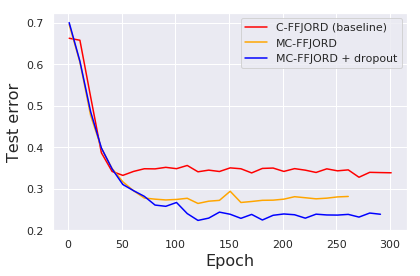

In [80]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

sns_plot = plot_line(file_names_bs900, keys_bs900, id_bs900, stride=10, stop_point=stop_point_bs900, color='red')
# sns_plot = plot_line(file_names_bs900_drop, keys_bs900_drop, id_bs900_drop, stride=10, stop_point=stop_point_bs900_drop, color='green')
sns_plot = plot_line(file_names_bs900_split, keys_bs900_split, id_bs900_split, stride=10, stop_point=stop_point_bs900_split, color='orange')
sns_plot = plot_line(file_names_bs900_split_drop, keys_bs900_split_drop, id_bs900_split_drop, stride=10, stop_point=stop_point_bs900_split_drop, color='blue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [83]:
###############################################################
#### Test error for conditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'error_test_cond_cifar_bs8k.pdf'

# # 8k
# file_names_bs8k = ['./figures/result_data/run-bs8k_cond_cifar10_run1_error_validation-tag-error.json',]
# keys_bs8k = ['run1']
# id_bs8k = 'C-FFJORD'
# stop_point_bs8k = 98


# 8k drop
file_names_bs8k_drop = ['./figures/result_data/run-bs8k_cond_cifar10_drop_run1_error_validation-tag-error.json',]
keys_bs8k_drop = ['run1']
id_bs8k_drop = 'C-FFJORD + dropout'
stop_point_bs8k_drop = 400

# 8k drop
file_names_bs8k_split_drop = ['./figures/result_data/run-bs8k_cond_cifar10_split_drop_run1_error_validation-tag-error.json',]
keys_bs8k_split_drop = ['run1']
id_bs8k_split_drop = 'MC-FFJORD + dropout'
stop_point_bs8k_split_drop = 500


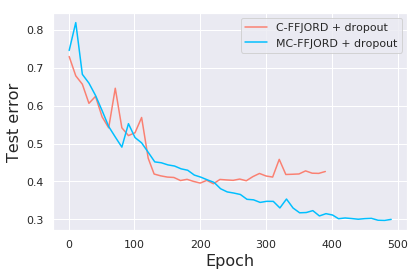

In [85]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

#sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=10, stop_point=stop_point_bs8k, color='Salmon')
#sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=10, stop_point=stop_point_bs8k_drop, color='MediumAquamarine')
sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=10, stop_point=stop_point_bs8k_drop, color='Salmon')
sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=10, stop_point=stop_point_bs8k_split_drop, color='DeepSkyBlue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [86]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'nll_test_cond_cifar_bs900.pdf'

# # bs900
# file_names_bs900 = ['./figures/result_data/run-bs900_cond_cifar10_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
# keys_bs900 = ['run1',]
# id_bs900 = 'C-FFJORD (baseline)'
# stop_point_bs900 = 500

# # bs900_drop
# file_names_bs900_drop = ['./figures/result_data/run-bs900_cond_cifar10_drop_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
# keys_bs900_drop = ['run1',]
# id_bs900_drop = 'C-FFJORD + dropout'
# stop_point_bs900_drop = 500

# bs900
file_names_bs900 = ['./figures/result_data/run-bs900_cond_cifar10_drop_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs900 = ['run1',]
id_bs900 = 'C-FFJORD (baseline)'
stop_point_bs900 = 500

# bs900_split
file_names_bs900_split = ['./figures/result_data/run-bs900_cond_cifar10_split_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs900_split = ['run1',]
id_bs900_split = 'MC-FFJORD'
stop_point_bs900_split = 500

# bs900_split_drop
file_names_bs900_split_drop = ['./figures/result_data/run-bs900_cond_cifar10_split_drop_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs900_split_drop = ['run1',]
id_bs900_split_drop = 'MC-FFJORD + dropout'
stop_point_bs900_split_drop = 500

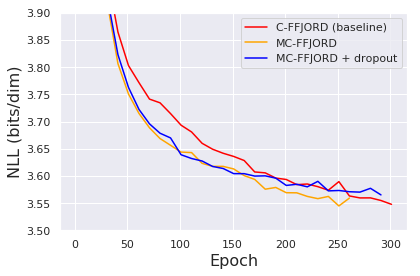

In [87]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

# sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=1)
# sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=1)
# sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=1)

sns_plot = plot_line(file_names_bs900, keys_bs900, id_bs900, stride=10, stop_point=stop_point_bs900, color='red')
#sns_plot = plot_line(file_names_bs900_drop, keys_bs900_drop, id_bs900_drop, stride=10, stop_point=stop_point_bs900_drop, color='green')
sns_plot = plot_line(file_names_bs900_split, keys_bs900_split, id_bs900_split, stride=10, stop_point=stop_point_bs900_split, color='orange')
sns_plot = plot_line(file_names_bs900_split_drop, keys_bs900_split_drop, id_bs900_split_drop, stride=10, stop_point=stop_point_bs900_split_drop, color='blue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_ylim(3.5,3.9)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'nll_test_cond_cifar_bs8k.pdf'

# 8k
file_names_bs8k = ['./figures/result_data/run-bs8k_cond_cifar10_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs8k = ['run1']
id_bs8k = 'C-FFJORD'
stop_point_bs8k = 98


# 8k drop
file_names_bs8k_drop = ['./figures/result_data/run-bs8k_cond_cifar10_drop_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs8k_drop = ['run1']
id_bs8k_drop = 'C-FFJORD + dropout'
stop_point_bs8k_drop = 400

# 8k drop
file_names_bs8k_split_drop = ['./figures/result_data/run-bs8k_cond_cifar10_split_drop_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs8k_split_drop = ['run1']
id_bs8k_split_drop = 'MC-FFJORD + dropout'
stop_point_bs8k_split_drop = 500


In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=10, stop_point=stop_point_bs8k, color='Salmon')
sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=10, stop_point=stop_point_bs8k_drop, color='MediumAquamarine')
sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=10, stop_point=stop_point_bs8k_split_drop, color='DeepSkyBlue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_ylim(3.5,4.5)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [90]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'nfe_cond_cifar_bs900.pdf'

# # bs900
# file_names_bs900 = ['./figures/result_data/run-bs900_cond_cifar10_run1_nfe_train_epoch-tag-nfe.json',]
# keys_bs900 = ['run1',]
# id_bs900 = 'C-FFJORD (baseline)'
# stop_point_bs900 = 500

# # bs900_drop
# file_names_bs900_drop = ['./figures/result_data/run-bs900_cond_cifar10_drop_run1_nfe_train_epoch-tag-nfe.json',]
# keys_bs900_drop = ['run1',]
# id_bs900_drop = 'C-FFJORD + dropout'
# stop_point_bs900_drop = 500

# bs900
file_names_bs900 = ['./figures/result_data/run-bs900_cond_cifar10_drop_run1_nfe_train_epoch-tag-nfe.json',]
keys_bs900 = ['run1',]
id_bs900 = 'C-FFJORD (baseline)'
stop_point_bs900 = 500

# bs900_split
file_names_bs900_split = ['./figures/result_data/run-bs900_cond_cifar10_split_run1_nfe_train_epoch-tag-nfe.json',]
keys_bs900_split = ['run1',]
id_bs900_split = 'MC-FFJORD'
stop_point_bs900_split = 500

# bs900_split_drop
file_names_bs900_split_drop = ['./figures/result_data/run-bs900_cond_cifar10_split_drop_run1_nfe_train_epoch-tag-nfe.json',]
keys_bs900_split_drop = ['run1',]
id_bs900_split_drop = 'MC-FFJORD + dropout'
stop_point_bs900_split_drop = 500

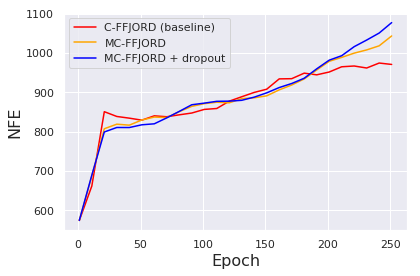

In [91]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

sns_plot = plot_line(file_names_bs900, keys_bs900, id_bs900, stride=10, stop_point=stop_point_bs900, color='red')
#sns_plot = plot_line(file_names_bs900_drop, keys_bs900_drop, id_bs900_drop, stride=10, stop_point=stop_point_bs900_drop, color='green')
sns_plot = plot_line(file_names_bs900_split, keys_bs900_split, id_bs900_split, stride=10, stop_point=stop_point_bs900_split, color='orange')
sns_plot = plot_line(file_names_bs900_split_drop, keys_bs900_split_drop, id_bs900_split_drop, stride=10, stop_point=stop_point_bs900_split_drop, color='blue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NFE', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [92]:
###############################################################
#### NFE for conditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'nfe_cond_cifar_bs8k.pdf'

# # 8k
# file_names_bs8k = ['./figures/result_data/run-bs8k_cond_cifar10_run1_nfe_train_epoch-tag-nfe.json',]
# keys_bs8k = ['run1']
# id_bs8k = 'C-FFJORD'
# stop_point_bs8k = 98


# 8k drop
file_names_bs8k_drop = ['./figures/result_data/run-bs8k_cond_cifar10_drop_run1_nfe_train_epoch-tag-nfe.json',]
keys_bs8k_drop = ['run1']
id_bs8k_drop = 'C-FFJORD + dropout'
stop_point_bs8k_drop = 400


# 8k drop split
file_names_bs8k_split_drop = ['./figures/result_data/run-bs8k_cond_cifar10_split_drop_run1_nfe_train_epoch-tag-nfe.json',]
keys_bs8k_split_drop = ['run1']
id_bs8k_split_drop = 'MC-FFJORD + dropout'
stop_point_bs8k_split_drop = 500


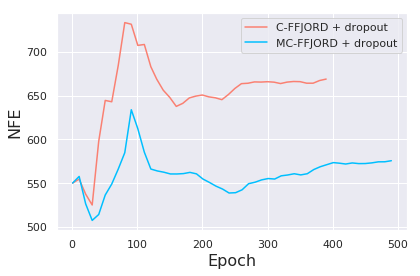

In [93]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

#sns_plot = plot_line(file_names_bs8k, keys_bs8k, id_bs8k, stride=10, stop_point=stop_point_bs8k, color='Salmon')
#sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=10, stop_point=stop_point_bs8k_drop, color='MediumAquamarine')
sns_plot = plot_line(file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride=10, stop_point=stop_point_bs8k_drop, color='Salmon')
sns_plot = plot_line(file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride=10, stop_point=stop_point_bs8k_split_drop, color='DeepSkyBlue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NFE', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'epoch_time_cond_cifar_bs900.pdf'

# bs900
file_names_bs900_t = ['./figures/result_data/run-bs900_cond_cifar10_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs900 = ['run1',]
id_bs900 = 'C-FFJORD (baseline)'
stop_point_bs900 = 500

# bs900_drop
file_names_bs900_drop_t = ['./figures/result_data/run-bs900_cond_cifar10_drop_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs900_drop = ['run1',]
id_bs900_drop = 'C-FFJORD + dropout'
stop_point_bs900_drop = 253

# bs900_split
file_names_bs900_split_t = ['./figures/result_data/run-bs900_cond_cifar10_split_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs900_split = ['run1',]
id_bs900_split = 'MC-FFJORD'
stop_point_bs900_split = 253

# bs900_split_drop
file_names_bs900_split_drop_t = ['./figures/result_data/run-bs900_cond_cifar10_split_drop_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs900_split_drop = ['run1',]
id_bs900_split_drop = 'MC-FFJORD + dropout'
stop_point_bs900_split_drop = 252

# 8k drop split
file_names_bs8k_split_drop_t = ['./figures/result_data/run-bs8k_cond_cifar10_split_drop_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs8k_split_drop = ['run1']
id_bs8k_split_drop = 'MC-FFJORD + dropout'
stop_point_bs8k_split_drop = 500

# 8k drop
file_names_bs8k_drop_t = ['./figures/result_data/run-bs8k_cond_cifar10_drop_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs8k_drop = ['run1']
id_bs8k_drop = 'C-FFJORD + dropout'
stop_point_bs8k_drop = 400

In [ ]:
###############################################################
#### Test error for conditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'error_test_cond_cifar_bs8k.pdf'

# 8k
file_names_bs8k = ['./figures/result_data/run-bs8k_cond_cifar10_run1_error_validation-tag-error.json',]
keys_bs8k = ['run1']
id_bs8k = 'C-FFJORD, bs=8K'
stop_point_bs8k = 98


# 8k drop
file_names_bs8k_drop = ['./figures/result_data/run-bs8k_cond_cifar10_drop_run1_error_validation-tag-error.json',]
keys_bs8k_drop = ['run1']
id_bs8k_drop = 'C-FFJORD + dropout, bs=8K'
stop_point_bs8k_drop = 400

# 8k drop
file_names_bs8k_split_drop = ['./figures/result_data/run-bs8k_cond_cifar10_split_drop_run1_error_validation-tag-error.json',]
keys_bs8k_split_drop = ['run1']
id_bs8k_split_drop = 'MC-FFJORD + dropout, bs=8K'
stop_point_bs8k_split_drop = 500

In [ ]:
###############################################################
#### Test error for conditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'error_test_cond_cifar_bs900.pdf'

# bs900
file_names_bs900 = ['./figures/result_data/run-bs900_cond_cifar10_run1_error_validation-tag-error.json',]
keys_bs900 = ['run1',]
id_bs900 = 'C-FFJORD (baseline)'
stop_point_bs900 = 500

# bs900_drop
file_names_bs900_drop = ['./figures/result_data/run-bs900_cond_cifar10_drop_run1_error_validation-tag-error.json',]
keys_bs900_drop = ['run1',]
id_bs900_drop = 'C-FFJORD + dropout'
stop_point_bs900_drop = 253

# bs900_split
file_names_bs900_split = ['./figures/result_data/run-bs900_cond_cifar10_split_run1_error_validation-tag-error.json',]
keys_bs900_split = ['run1',]
id_bs900_split = 'MC-FFJORD'
stop_point_bs900_split = 253

# bs900_split_drop
file_names_bs900_split_drop = ['./figures/result_data/run-bs900_cond_cifar10_split_drop_run1_error_validation-tag-error.json',]
keys_bs900_split_drop = ['run1',]
id_bs900_split_drop = 'MC-FFJORD + dropout'
stop_point_bs900_split_drop = 252

In [ ]:
sns.set(style="darkgrid")
def make_dataframe_loss_vs_time(filenames_time, filenames_loss, keys, trial_id, color=None, stride = 1, stop_point=500):
    dat_t = 0
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
    
        stop_point_t = min(stop_point, len(dat_tf))
        try:
            
            dat_t = dat_t + np.array(dat_tf[0:stop_point_t])
        except:
            Tracer()()
    
    dat_t /= len(filenames_time)
    dat_t = list(np.cumsum(dat_t[:,2]))
    stop_point_t = min(stop_point, len(dat_t))
    dat_t = dat_t[:stop_point_t:stride]
    
    df = []
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        stop_point_l = min(stop_point, len(dat_l))
        dat_l = dat_l[:stop_point_l:stride]
        df_l  = pd.DataFrame(dat_l, columns=['wall_time', 'step', 'value'])
        try:
            df_l['step_time'] = dat_t
        except:
            print(fnl)
            Tracer()()
        df.append(df_l)
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step_time", y="value", data=df, label=trial_id, color=color)
    
    return sns_plot

save_name = 'test_error_vs_time_cond_cifar_bs900_8k.pdf'

sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_split_drop_t, file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride = 10, stop_point=stop_point_bs8k_split_drop, color='DeepSkyBlue')
sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_drop_t, file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride = 10, stop_point=stop_point_bs8k_drop, color='MediumAquamarine')
#sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_t, file_names_bs8k, keys_bs8k, id_bs8k, stride = 10, stop_point=stop_point_bs8k)
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_split_drop_t, file_names_bs900_split_drop, keys_bs900_split_drop, id_bs900_split_drop, stride = 10, stop_point=stop_point_bs900_split_drop, color='blue')
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_drop_t, file_names_bs900_drop, keys_bs900_drop, id_bs900_drop, stride = 10, stop_point=stop_point_bs900_drop, color='green')
#sns_plot = make_dataframe_loss_vs_time(file_names_bs900_split_t, file_names_bs900_split, keys_bs900_split, id_bs900_split, stride = 10, stop_point=stop_point_bs900_split)
#sns_plot = make_dataframe_loss_vs_time(file_names_bs900_t, file_names_bs900, keys_bs900, id_bs900, stride = 10, stop_point=stop_point_bs900)

sns_plot.set_xlabel('Time (seconds)', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Test error for conditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'nll_test_cond_cifar_bs8k.pdf'

# 8k
file_names_bs8k = ['./figures/result_data/run-bs8k_cond_cifar10_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs8k = ['run1']
id_bs8k = 'C-FFJORD, bs=8K'
stop_point_bs8k = 98


# 8k drop
file_names_bs8k_drop = ['./figures/result_data/run-bs8k_cond_cifar10_drop_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs8k_drop = ['run1']
id_bs8k_drop = 'C-FFJORD + dropout, bs=8K'
stop_point_bs8k_drop = 400

# 8k drop
file_names_bs8k_split_drop = ['./figures/result_data/run-bs8k_cond_cifar10_split_drop_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs8k_split_drop = ['run1']
id_bs8k_split_drop = 'MC-FFJORD + dropout, bs=8K'
stop_point_bs8k_split_drop = 500

In [ ]:
###############################################################
#### Test error for conditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'nll_test_cond_cifar_bs900.pdf'

# bs900
file_names_bs900 = ['./figures/result_data/run-bs900_cond_cifar10_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs900 = ['run1',]
id_bs900 = 'C-FFJORD (baseline)'
stop_point_bs900 = 500

# bs900_drop
file_names_bs900_drop = ['./figures/result_data/run-bs900_cond_cifar10_drop_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs900_drop = ['run1',]
id_bs900_drop = 'C-FFJORD + dropout'
stop_point_bs900_drop = 253

# bs900_split
file_names_bs900_split = ['./figures/result_data/run-bs900_cond_cifar10_split_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs900_split = ['run1',]
id_bs900_split = 'MC-FFJORD'
stop_point_bs900_split = 253

# bs900_split_drop
file_names_bs900_split_drop = ['./figures/result_data/run-bs900_cond_cifar10_split_drop_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs900_split_drop = ['run1',]
id_bs900_split_drop = 'MC-FFJORD + dropout'
stop_point_bs900_split_drop = 252

In [ ]:
sns.set(style="darkgrid")
def make_dataframe_loss_vs_time(filenames_time, filenames_loss, keys, trial_id, color=None, stride = 1, stop_point=500):
    dat_t = 0
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
    
        stop_point_t = min(stop_point, len(dat_tf))
        try:
            
            dat_t = dat_t + np.array(dat_tf[0:stop_point_t])
        except:
            Tracer()()
    
    dat_t /= len(filenames_time)
    dat_t = list(np.cumsum(dat_t[:,2]))
    stop_point_t = min(stop_point, len(dat_t))
    dat_t = dat_t[:stop_point_t:stride]
    
    df = []
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        stop_point_l = min(stop_point, len(dat_l))
        dat_l = dat_l[:stop_point_l:stride]
        df_l  = pd.DataFrame(dat_l, columns=['wall_time', 'step', 'value'])
        try:
            df_l['step_time'] = dat_t
        except:
            print(fnl)
            Tracer()()
        df.append(df_l)
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step_time", y="value", data=df, label=trial_id, color=color)
    
    return sns_plot

save_name = 'test_nll_vs_time_cond_cifar_bs900_8k.pdf'

sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_split_drop_t, file_names_bs8k_split_drop, keys_bs8k_split_drop, id_bs8k_split_drop, stride = 10, stop_point=stop_point_bs8k_split_drop, color='DeepSkyBlue')
sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_drop_t, file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride = 10, stop_point=stop_point_bs8k_drop, color='MediumAquamarine')
#sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_t, file_names_bs8k, keys_bs8k, id_bs8k, stride = 10, stop_point=stop_point_bs8k)
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_split_drop_t, file_names_bs900_split_drop, keys_bs900_split_drop, id_bs900_split_drop, stride = 10, stop_point=stop_point_bs900_split_drop, color='blue')
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_drop_t, file_names_bs900_drop, keys_bs900_drop, id_bs900_drop, stride = 10, stop_point=stop_point_bs900_drop, color='green')
#sns_plot = make_dataframe_loss_vs_time(file_names_bs900_split_t, file_names_bs900_split, keys_bs900_split, id_bs900_split, stride = 10, stop_point=stop_point_bs900_split)
#sns_plot = make_dataframe_loss_vs_time(file_names_bs900_t, file_names_bs900, keys_bs900, id_bs900, stride = 10, stop_point=stop_point_bs900)

sns_plot.set_xlabel('Time (seconds)', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_ylim(3.5,4.0)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [35]:
###############################################################
#### Epoch time for conditional FFJORD on MNIST ####
###############################################################

save_dir = './figures'

# bs900
file_names_bs900_t = ['./figures/result_data/run-bs900_cond_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs900 = ['run1',]
id_bs900 = 'C-FFJORD (baseline)'
stop_point_bs900 = 500

# bs900_drop
file_names_bs900_drop_t = ['./figures/result_data/run-bs900_cond_drop_run1_epoch_time_validation-tag-epoch_time.json',
                          './figures/result_data/run-bs900_cond_drop_run2_epoch_time_validation-tag-epoch_time.json',]
#                           './figures/result_data/run-bs900_cond_drop_run3_epoch_time_validation-tag-epoch_time.json',]
keys_bs900_drop = ['run1','run2']
id_bs900_drop = 'C-FFJORD + dropout'
stop_point_bs900_drop = 500

# bs900_split
file_names_bs900_split_t = ['./figures/result_data/run-bs900_cond_split_0_25_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs900_split = ['run1',]
id_bs900_split = 'MC-FFJORD-0_25'
stop_point_bs900_split = 500

# bs900_split_drop
file_names_bs900_split_0_25_drop_t = ['./figures/result_data/run-bs900_cond_split_0_25_drop_run1_epoch_time_validation-tag-epoch_time.json',]
keys_bs900_split_0_25_drop = ['run1',]
id_bs900_split_0_25_drop = 'MC-FFJORD-0_25 + dropout'
stop_point_bs900_split_0_25_drop = 500

# bs900_split_drop
file_names_bs900_split_0_5_drop_t = ['./figures/result_data/run-bs900_cond_split_0_5_drop_run1_epoch_time_validation-tag-epoch_time.json',
                                    './figures/result_data/run-bs900_cond_split_0_5_drop_run2_epoch_time_validation-tag-epoch_time.json',]
keys_bs900_split_0_5_drop = ['run1','run2']
id_bs900_split_0_5_drop = 'MC-FFJORD-0_5 + dropout'
stop_point_bs900_split_0_5_drop = 500

# 8k drop split
file_names_bs8k_split_0_25_drop_t = ['./figures/result_data/run-bs8k_cond_dis_0_25_drop_run2_epoch_time_validation-tag-epoch_time.json',
                                    './figures/result_data/run-bs8k_cond_dis_0_25_drop_run3_epoch_time_validation-tag-epoch_time.json',]
keys_bs8k_split_0_25_drop = ['run2','run3']
id_bs8k_split_0_25_drop = 'MC-FFJORD-0_25 + dropout, bs=8k'
stop_point_bs8k_split_0_25_drop = 500

# 8k drop split
file_names_bs8k_split_0_5_drop_t = ['./figures/result_data/run-bs8k_cond_dis_0_5_drop_run1_epoch_time_validation-tag-epoch_time.json',]
#                                     './figures/result_data/run-bs8k_cond_dis_0_5_drop_run2_epoch_time_validation-tag-epoch_time.json',]
keys_bs8k_split_0_5_drop = ['run1']
id_bs8k_split_0_5_drop = 'MC-FFJORD-0_5 + dropout, bs=8k'
stop_point_bs8k_split_0_5_drop = 500

# 8k drop
file_names_bs8k_drop_t = ['./figures/result_data/run-bs8k_cond_drop_run1_epoch_time_validation-tag-epoch_time.json',
                         './figures/result_data/run-bs8k_cond_drop_run3_epoch_time_validation-tag-epoch_time.json']
keys_bs8k_drop = ['run1','run3']
id_bs8k_drop = 'C-FFJORD + dropout, bs=8k'
stop_point_bs8k_drop = 500

In [49]:
###############################################################
#### Test error for conditional FFJORD on MNIST ####
###############################################################

save_dir = './figures'

# bs900
file_names_bs900 = ['./figures/result_data/run-bs900_cond_run1_error_validation-tag-error.json',]
keys_bs900 = ['run1',]
id_bs900 = 'C-FFJORD (baseline)'
stop_point_bs900 = 500

# bs900_drop
file_names_bs900_drop = ['./figures/result_data/run-bs900_cond_drop_run1_error_validation-tag-error.json',
                          './figures/result_data/run-bs900_cond_drop_run2_error_validation-tag-error.json',]
#                           './figures/result_data/run-bs900_cond_drop_run3_error_validation-tag-error.json',]
keys_bs900_drop = ['run1','run2']
id_bs900_drop = 'C-FFJORD + dropout'
stop_point_bs900_drop = 500

# bs900_split
file_names_bs900_split = ['./figures/result_data/run-bs900_cond_split_0_25_run1_error_validation-tag-error.json',]
keys_bs900_split = ['run1',]
id_bs900_split = 'MC-FFJORD-0_25'
stop_point_bs900_split = 500

# bs900_split_drop
file_names_bs900_split_0_25_drop = ['./figures/result_data/run-bs900_cond_split_0_25_drop_run1_error_validation-tag-error.json',]
keys_bs900_split_0_25_drop = ['run1',]
id_bs900_split_0_25_drop = 'MC-FFJORD-0_25 + dropout'
stop_point_bs900_split_0_25_drop = 500

# bs900_split_drop
file_names_bs900_split_0_5_drop = ['./figures/result_data/run-bs900_cond_split_0_5_drop_run1_error_validation-tag-error.json',
                                    './figures/result_data/run-bs900_cond_split_0_5_drop_run2_error_validation-tag-error.json',]
keys_bs900_split_0_5_drop = ['run1','run2']
id_bs900_split_0_5_drop = 'MC-FFJORD-0_5 + dropout'
stop_point_bs900_split_0_5_drop = 500

# 8k drop split
file_names_bs8k_split_0_25_drop = ['./figures/result_data/run-bs8k_cond_dis_0_25_drop_run2_error_validation-tag-error.json',
                                    './figures/result_data/run-bs8k_cond_dis_0_25_drop_run3_error_validation-tag-error.json',]
keys_bs8k_split_0_25_drop = ['run2','run3']
id_bs8k_split_0_25_drop = 'MC-FFJORD-0_25 + dropout, bs=8k'
stop_point_bs8k_split_0_25_drop = 500

# 8k drop split
file_names_bs8k_split_0_5_drop = ['./figures/result_data/run-bs8k_cond_dis_0_5_drop_run1_error_validation-tag-error.json',]
#                                     './figures/result_data/run-bs8k_cond_dis_0_5_drop_run2_error_validation-tag-error.json',]
keys_bs8k_split_0_5_drop = ['run1']
id_bs8k_split_0_5_drop = 'MC-FFJORD-0_5 + dropout, bs=8k'
stop_point_bs8k_split_0_5_drop = 500

# 8k drop
file_names_bs8k_drop = ['./figures/result_data/run-bs8k_cond_drop_run1_error_validation-tag-error.json',
                         './figures/result_data/run-bs8k_cond_drop_run3_error_validation-tag-error.json']
keys_bs8k_drop = ['run1','run3']
id_bs8k_drop = 'C-FFJORD + dropout, bs=8k'
stop_point_bs8k_drop = 500

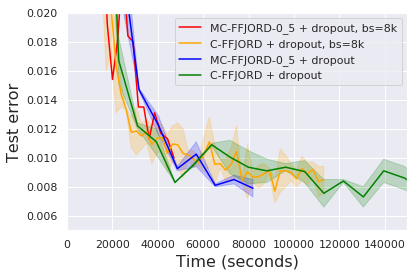

In [53]:
sns.set(style="darkgrid")
def make_dataframe_loss_vs_time(filenames_time, filenames_loss, keys, trial_id, color=None, stride = 1, stop_point=500):
    dat_t = 0
    stop_point_t = 500
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
    
        stop_point_t = min(stop_point_t, len(dat_tf))
        
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
        try:
            dat_t = dat_t + np.array(dat_tf[0:stop_point_t])
        except:
            print(fnt)
            Tracer()()
    
    dat_t /= len(filenames_time)
    dat_t = list(np.cumsum(dat_t[:,2]))
    stop_point_t = min(stop_point, len(dat_t))
    dat_t = dat_t[:stop_point_t:stride]
    
    df = []
    stop_point_l = 500
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        stop_point_l = min(stop_point_l, len(dat_l))
        
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        dat_l = dat_l[:stop_point_l:stride]
        df_l  = pd.DataFrame(dat_l, columns=['wall_time', 'step', 'value'])
        try:
            df_l['step_time'] = dat_t
        except:
            print(fnl)
            Tracer()()
        df.append(df_l)
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step_time", y="value", data=df, label=trial_id, color=color)
    
    return sns_plot

save_name = 'test_error_vs_time_cond_mnist_bs900_8k.pdf'

#sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_split_0_25_drop_t, file_names_bs8k_split_0_25_drop, keys_bs8k_split_0_25_drop, id_bs8k_split_0_25_drop, stride = 10, stop_point=stop_point_bs8k_split_0_25_drop, color='DeepSkyBlue')
sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_split_0_5_drop_t, file_names_bs8k_split_0_5_drop, keys_bs8k_split_0_5_drop, id_bs8k_split_0_5_drop, stride = 10, stop_point=stop_point_bs8k_split_0_5_drop, color='Red')
sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_drop_t, file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride = 10, stop_point=stop_point_bs8k_drop, color='Orange')

#sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_t, file_names_bs8k, keys_bs8k, id_bs8k, stride = 10, stop_point=stop_point_bs8k)

#sns_plot = make_dataframe_loss_vs_time(file_names_bs900_split_0_25_drop_t, file_names_bs900_split_0_25_drop, keys_bs900_split_0_25_drop, id_bs900_split_0_25_drop, stride = 10, stop_point=stop_point_bs900_split_0_25_drop, color='blue')
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_split_0_5_drop_t, file_names_bs900_split_0_5_drop, keys_bs900_split_0_5_drop, id_bs900_split_0_5_drop, stride = 10, stop_point=stop_point_bs900_split_0_5_drop, color='blue')
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_drop_t, file_names_bs900_drop, keys_bs900_drop, id_bs900_drop, stride = 10, stop_point=stop_point_bs900_drop, color='green')
#sns_plot = make_dataframe_loss_vs_time(file_names_bs900_split_t, file_names_bs900_split, keys_bs900_split, id_bs900_split, stride = 10, stop_point=stop_point_bs900_split)
#sns_plot = make_dataframe_loss_vs_time(file_names_bs900_t, file_names_bs900, keys_bs900, id_bs900, stride = 10, stop_point=stop_point_bs900)

sns_plot.set_xlabel('Time (seconds)', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)
sns_plot.set_ylim(0.005,0.02)
sns_plot.set_xlim(0.0,150000)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [43]:
###############################################################
#### Test error for conditional FFJORD on MNIST ####
###############################################################

save_dir = './figures'

# bs900
file_names_bs900 = ['./figures/result_data/run-bs900_cond_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs900 = ['run1',]
id_bs900 = 'C-FFJORD (baseline)'
stop_point_bs900 = 500

# bs900_drop
file_names_bs900_drop = ['./figures/result_data/run-bs900_cond_drop_run1_bits_per_dim_validation-tag-bits_per_dim.json',
                          './figures/result_data/run-bs900_cond_drop_run2_bits_per_dim_validation-tag-bits_per_dim.json',]
#                           './figures/result_data/run-bs900_cond_drop_run3_error_validation-tag-error.json',]
keys_bs900_drop = ['run1','run2']
id_bs900_drop = 'C-FFJORD + dropout'
stop_point_bs900_drop = 500

# bs900_split
file_names_bs900_split = ['./figures/result_data/run-bs900_cond_split_0_25_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs900_split = ['run1',]
id_bs900_split = 'MC-FFJORD-0_25'
stop_point_bs900_split = 500

# bs900_split_drop
file_names_bs900_split_0_25_drop = ['./figures/result_data/run-bs900_cond_split_0_25_drop_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs900_split_0_25_drop = ['run1',]
id_bs900_split_0_25_drop = 'MC-FFJORD-0_25 + dropout'
stop_point_bs900_split_0_25_drop = 500

# bs900_split_drop
file_names_bs900_split_0_5_drop = ['./figures/result_data/run-bs900_cond_split_0_5_drop_run1_bits_per_dim_validation-tag-bits_per_dim.json',
                                    './figures/result_data/run-bs900_cond_split_0_5_drop_run2_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs900_split_0_5_drop = ['run1','run2']
id_bs900_split_0_5_drop = 'MC-FFJORD-0_5 + dropout'
stop_point_bs900_split_0_5_drop = 500

# 8k drop split
file_names_bs8k_split_0_25_drop = ['./figures/result_data/run-bs8k_cond_dis_0_25_drop_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                                    './figures/result_data/run-bs8k_cond_dis_0_25_drop_run3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_bs8k_split_0_25_drop = ['run2','run3']
id_bs8k_split_0_25_drop = 'MC-FFJORD-0_25 + dropout, bs=8k'
stop_point_bs8k_split_0_25_drop = 500

# 8k drop split
file_names_bs8k_split_0_5_drop = ['./figures/result_data/run-bs8k_cond_dis_0_5_drop_run1_bits_per_dim_validation-tag-bits_per_dim.json',]
#                                     './figures/result_data/run-bs8k_cond_dis_0_5_drop_run2_error_validation-tag-error.json',]
keys_bs8k_split_0_5_drop = ['run1']
id_bs8k_split_0_5_drop = 'MC-FFJORD-0_5 + dropout, bs=8k'
stop_point_bs8k_split_0_5_drop = 500

# 8k drop
file_names_bs8k_drop = ['./figures/result_data/run-bs8k_cond_drop_run1_bits_per_dim_validation-tag-bits_per_dim.json',
                         './figures/result_data/run-bs8k_cond_drop_run3_bits_per_dim_validation-tag-bits_per_dim.json']
keys_bs8k_drop = ['run1','run3']
id_bs8k_drop = 'C-FFJORD + dropout, bs=8k'
stop_point_bs8k_drop = 500

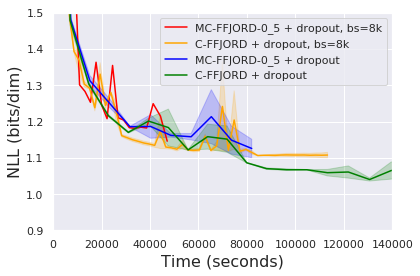

In [48]:
sns.set(style="darkgrid")
def make_dataframe_loss_vs_time(filenames_time, filenames_loss, keys, trial_id, color=None, stride = 1, stop_point=500):
    dat_t = 0
    stop_point_t = 500
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
    
        stop_point_t = min(stop_point_t, len(dat_tf))
        
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
        try:
            dat_t = dat_t + np.array(dat_tf[0:stop_point_t])
        except:
            print(fnt)
            Tracer()()
    
    dat_t /= len(filenames_time)
    dat_t = list(np.cumsum(dat_t[:,2]))
    stop_point_t = min(stop_point, len(dat_t))
    dat_t = dat_t[:stop_point_t:stride]
    
    df = []
    stop_point_l = 500
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        stop_point_l = min(stop_point_l, len(dat_l))
        
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        dat_l = dat_l[:stop_point_l:stride]
        df_l  = pd.DataFrame(dat_l, columns=['wall_time', 'step', 'value'])
        try:
            df_l['step_time'] = dat_t
        except:
            print(fnl)
            Tracer()()
        df.append(df_l)
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step_time", y="value", data=df, label=trial_id, color=color)
    
    return sns_plot

save_name = 'test_nll_vs_time_cond_mnist_bs900_8k.pdf'

#sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_split_0_25_drop_t, file_names_bs8k_split_0_25_drop, keys_bs8k_split_0_25_drop, id_bs8k_split_0_25_drop, stride = 10, stop_point=stop_point_bs8k_split_0_25_drop, color='DeepSkyBlue')
sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_split_0_5_drop_t, file_names_bs8k_split_0_5_drop, keys_bs8k_split_0_5_drop, id_bs8k_split_0_5_drop, stride = 10, stop_point=stop_point_bs8k_split_0_5_drop, color='Red')
sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_drop_t, file_names_bs8k_drop, keys_bs8k_drop, id_bs8k_drop, stride = 10, stop_point=stop_point_bs8k_drop, color='Orange')

#sns_plot = make_dataframe_loss_vs_time(file_names_bs8k_t, file_names_bs8k, keys_bs8k, id_bs8k, stride = 10, stop_point=stop_point_bs8k)

#sns_plot = make_dataframe_loss_vs_time(file_names_bs900_split_0_25_drop_t, file_names_bs900_split_0_25_drop, keys_bs900_split_0_25_drop, id_bs900_split_0_25_drop, stride = 10, stop_point=stop_point_bs900_split_0_25_drop, color='blue')
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_split_0_5_drop_t, file_names_bs900_split_0_5_drop, keys_bs900_split_0_5_drop, id_bs900_split_0_5_drop, stride = 10, stop_point=stop_point_bs900_split_0_5_drop, color='blue')
sns_plot = make_dataframe_loss_vs_time(file_names_bs900_drop_t, file_names_bs900_drop, keys_bs900_drop, id_bs900_drop, stride = 10, stop_point=stop_point_bs900_drop, color='green')
#sns_plot = make_dataframe_loss_vs_time(file_names_bs900_split_t, file_names_bs900_split, keys_bs900_split, id_bs900_split, stride = 10, stop_point=stop_point_bs900_split)
#sns_plot = make_dataframe_loss_vs_time(file_names_bs900_t, file_names_bs900, keys_bs900, id_bs900, stride = 10, stop_point=stop_point_bs900)

sns_plot.set_xlabel('Time (seconds)', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_ylim(0.9,1.5)
sns_plot.set_xlim(0.0,140000)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))